In [9]:
dataverse_path='/Users/jessicasun/Desktop/research files/cones dataverse/data'

Run this notebook after running 1_processing.ipynb and 2_misorientation.ipynb. This notebook generates the plots used in the paper, and has the additional supplementary figure on finding the different power law fits.

In [10]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from skimage import io
from matplotlib import colors
from matplotlib import cm
from scipy.stats import circmean, sem, circstd
from scipy.optimize import curve_fit
import pandas as pd

In [11]:
dir_path=dataverse_path+'/'
files_df=pd.read_pickle(dir_path+'files_df.pkl')
files_df['files_df_idx']=range(len(files_df))

get misorientation plot


/Users/jessicasun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jessicasun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jessicasun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jessicasun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

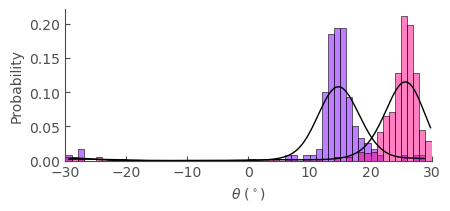

In [12]:
print('get misorientation plot')
filtered_df1=pd.read_pickle(dir_path+'/all grains/orientation/full/grain/122_082923_cone3_Combined Stacks1-1_1.pkl')
filtered_df2=pd.read_pickle(dir_path+'/all grains/orientation/full/grain/122_082923_cone3_Combined Stacks1-1_2.pkl')
cm = 1/2.54 
fig=plt.figure(figsize=(12*cm,5*cm))
ax=fig.add_subplot(111)

mean1=circmean(filtered_df1['node_ij_avg'],low=-30,high=30)
norm=colors.Normalize(vmin=-30, vmax=30)
color=plt.cm.hsv(norm(mean1))  
sns.histplot(filtered_df1['node_ij_avg'],stat='probability',bins=np.arange(-30,31,1),ax=ax,color=color,alpha=0.5,kde=True,line_kws=dict(linewidth=1)) #,line_kws=dict(),kde_kws=dict(cut=10)
ax.lines[0].set_color('black')

mean2=circmean(filtered_df2['node_ij_avg'],low=-30,high=30)
norm=colors.Normalize(vmin=-30, vmax=30)
color=plt.cm.hsv(norm(mean2))  
sns.histplot(filtered_df2['node_ij_avg'],stat='probability',bins=np.arange(-30,31,1),ax=ax,color=color,alpha=0.5,kde=True,line_kws=dict(linewidth=1)) #,line_kws=dict(),kde_kws=dict(cut=10)
ax.lines[1].set_color('black')

ax.set_xlim(-30,30)
ax.set_xlabel(r'$\theta$'+' ('+r'$^\circ)$')
ax.set_ylabel('Probability')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

im_path=dir_path+'/all grains/orientation/full/grain/'+'122'+'_'+files_df.iloc[122]['file_name'].split('.')[0]
plt.savefig(im_path+'.svg',bbox_inches='tight', pad_inches=0)    
plt.savefig(im_path+'.png',bbox_inches='tight', pad_inches=0)    

In [13]:
mean1=circmean(filtered_df1['node_ij_avg'],low=-30,high=30)
uncertainty1=circstd(filtered_df1['node_ij_avg'],low=-30,high=30)/np.sqrt(len(filtered_df1))
print(mean1,uncertainty1)

mean2=circmean(filtered_df2['node_ij_avg'],low=-30,high=30)
uncertainty2=circstd(filtered_df2['node_ij_avg'],low=-30,high=30)/np.sqrt(len(filtered_df2))
print(mean2,uncertainty2)

misorientation=np.abs(mean1-mean2)
final_uncertainty=np.sqrt(uncertainty1**2+uncertainty2**2)
print(misorientation,final_uncertainty)

15.307237015912072 0.3437352296924144
25.317391584816328 0.1734147402858009
10.010154568904255 0.38500205230633333


get misorientation plot


/Users/jessicasun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jessicasun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jessicasun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jessicasun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

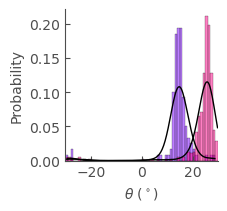

In [14]:
print('get misorientation plot')
filtered_df1=pd.read_pickle(dir_path+'/all grains/orientation/full/grain/122_082923_cone3_Combined Stacks1-1_1.pkl')
filtered_df2=pd.read_pickle(dir_path+'/all grains/orientation/full/grain/122_082923_cone3_Combined Stacks1-1_2.pkl')
cm = 1/2.54 
fig=plt.figure(figsize=(5*cm,5*cm))
ax=fig.add_subplot(111)

# sns.histplot(orientation_combined,bins=bins,ax=ax,color='black',kde=True,line_kws=dict(),kde_kws=dict(cut=10))
# sns.rugplot(orientation_combined,color='black')
# sns.scatter()
mean1=circmean(filtered_df1['node_ij_avg'],low=-30,high=30)
norm=colors.Normalize(vmin=-30, vmax=30)
color=plt.cm.hsv(norm(mean1))  
# ax.hist(filtered_df1['node_ij_avg'],bins=np.arange(-30,31,1),color=color,alpha=0.5)
sns.histplot(filtered_df1['node_ij_avg'],stat='probability',bins=np.arange(-30,31,1),ax=ax,color=color,alpha=0.5,kde=True,line_kws=dict(linewidth=1)) #,line_kws=dict(),kde_kws=dict(cut=10)
ax.lines[0].set_color('black')

mean2=circmean(filtered_df2['node_ij_avg'],low=-30,high=30)
norm=colors.Normalize(vmin=-30, vmax=30)
color=plt.cm.hsv(norm(mean2))  
# ax.hist(filtered_df2['node_ij_avg'],bins=np.arange(-30,31,1),color=color,alpha=0.5)
sns.histplot(filtered_df2['node_ij_avg'],stat='probability',bins=np.arange(-30,31,1),ax=ax,color=color,alpha=0.5,kde=True,line_kws=dict(linewidth=1)) #,line_kws=dict(),kde_kws=dict(cut=10)
ax.lines[1].set_color('black')

ax.set_xlim(-30,30)
# ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\theta$'+' ('+r'$^\circ)$')
ax.set_ylabel('Probability')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

im_path=dir_path+'/all grains/orientation/full/grain/'+'122'+'_'+files_df.iloc[122]['file_name'].split('.')[0]+'square'
plt.savefig(im_path+'.svg',bbox_inches='tight', pad_inches=0)    
plt.savefig(im_path+'.png',bbox_inches='tight', pad_inches=0)    

get grain boundary misorientation measurements
fit y= 0.89 x+ 0.91


/Users/jessicasun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jessicasun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


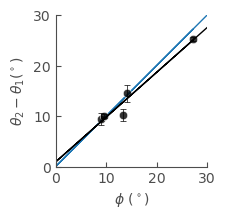

In [15]:
print('get grain boundary misorientation measurements') #measured across a self-intersecting grain boundary, using only grains on the SAME half-sector
filename_list=[]
for files_df_idx in [20, 21, 24, 113, 122]:
    filename_list+=[str(files_df_idx)+'_'+files_df['file_name'].iloc[files_df_idx][:-4]]
    
coneangle_list=[]
sectorangle_list=[]
misorientation_list=[]
std_list=[]
for filename in filename_list:
    filtered_df1=pd.read_pickle(dir_path+'/all grains/orientation/full/grain/'+filename+'_1.pkl')
    filtered_df2=pd.read_pickle(dir_path+'/all grains/orientation/full/grain/'+filename+'_2.pkl')

    mean1=circmean(filtered_df1['node_ij_avg'],low=-30,high=30)
    mean2=circmean(filtered_df2['node_ij_avg'],low=-30,high=30)
    
    std1=circstd(filtered_df1['node_ij_avg'],low=-30,high=30)/np.sqrt(len(filtered_df1))
    std2=circstd(filtered_df2['node_ij_avg'],low=-30,high=30)/np.sqrt(len(filtered_df2))
    
    sectorangle_list+=[files_df['sectorangle'].iloc[int(filename.split('_')[0])]]
    coneangle_list+=[files_df['coneangle'].iloc[int(filename.split('_')[0])]]
    misorientation_list+=[np.abs(mean2-mean1)]
    std_list+=[np.sqrt(std1**2+std2**2)] #https://online.stat.psu.edu/stat500/book/export/html/572
    
fig=plt.figure(figsize=(12*cm,5*cm))
ax=fig.add_subplot(111)

x=sectorangle_list
y=misorientation_list
yerr=std_list
sns.scatterplot(x=x,y=y,ax=ax,color='k',alpha=0.8)
plt.errorbar(x=x,y=y,yerr=yerr,color='k',elinewidth=0.5,label=None, capsize=2, capthick=0.5,linestyle='')
a, b = np.polyfit(x, y, 1)
ax.plot(np.array(x+[0,30]),a*np.array(x+[0,30])+b,color='k',linewidth=1)
ax.plot(np.array(x+[0,30]),1*np.array(x+[0,30]),color='C0',linewidth=1,zorder=0)
print('fit y=',round(a,2),'x+',round(b,2))
ax.set_aspect('equal')
ax.set_xlim(0,30)
ax.set_ylim(0,30)
ax.set_xlabel(r'$\phi$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$\theta_2 - \theta_1$'+r'$ (^\circ)$')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

im_path=dir_path+'/all grains/orientation/full/grain/'+'misorientation_vs_sectorangle'
plt.savefig(im_path+'.svg',bbox_inches='tight', pad_inches=0)    
plt.savefig(im_path+'.png',bbox_inches='tight', pad_inches=0)    

In [16]:
misorientation_df=pd.DataFrame({'filename_list':filename_list,
             'coneangle_list':coneangle_list,
             'sectorangle_list':sectorangle_list,
             'misorientation_list':misorientation_list,
             'std_list':std_list})
misorientation_df.sort_values(by='sectorangle_list')

filename_list  coneangle_list  sectorangle_list  \
3  113_081223_cone1_Combined Stacks6-2        2.881545          9.051688   
4  122_082923_cone3_Combined Stacks1-1        3.054975          9.596350   
2   24_080123_cone2_Combined Stacks1-2        4.219921         13.254275   
1   21_073123_cone1_Combined Stacks1-2        4.480687         14.072906   
0   20_073123_cone1_Combined Stacks1-1        8.646798         27.138945   

   misorientation_list  std_list  
3             9.464639  1.161307  
4            10.010155  0.385002  
2            10.209612  1.165861  
1            14.492258  1.744237  
0            25.231494  0.428211

In [17]:
print('find initial values and store in data_df')
px2um=0.0601936

coneangle_lim=[0,np.max(np.abs(files_df['coneangle']))]
sectorangle_lim=[0,np.max(np.abs(files_df['sectorangle']))]
bandwidth_lim=[0,np.max(files_df['band_width'])*px2um]
diam_lim=[np.min(files_df['band_diam_0'])*px2um,np.max(files_df['band_diam_0'])*px2um]

data_df=pd.DataFrame([])
data_df['coneangle']=np.abs(files_df['coneangle'])
data_df['sectorangle']=np.abs(files_df['sectorangle'])
data_df['band_width_um']=files_df['band_width']*px2um

data_df['coneangle_rad']=np.deg2rad(data_df['coneangle'])
data_df['sectorangle_rad']=np.deg2rad(data_df['sectorangle'])

#place all 0 with np.nan for the log columns
data_df[data_df==0]=np.nan
# data_df[data_df==0]=10**-10
data_df['log_coneangle_rad']=np.log(data_df['coneangle_rad'])
data_df['log_sectorangle_rad']=np.log(data_df['sectorangle_rad'])
data_df['log_width_um']=np.log(data_df['band_width_um'])

#reimport the main columns with full values
data_df['coneangle']=np.abs(files_df['coneangle'])
data_df['sectorangle']=np.abs(files_df['sectorangle'])
data_df['coneangle_rad']=np.deg2rad(data_df['coneangle'])
data_df['sectorangle_rad']=np.deg2rad(data_df['sectorangle'])
data_df['band_width_um']=files_df['band_width']*px2um
data_df['band_diam_um']=files_df['band_diam_0']*px2um

#dislocation spacing
a0=0.710 #where b = a0 burgers vector
data_df['dislocation_spacing']=a0/np.tan(data_df['sectorangle_rad']) #um

find initial values and store in data_df


plot raw data. use cone angle, since theory is written in terms of cone angle


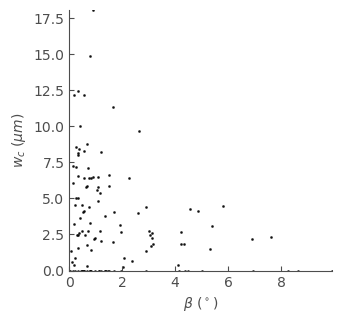

In [18]:
print('plot raw data. use cone angle, since theory is written in terms of cone angle')
cm = 1/2.54 

fig=plt.figure(figsize=(8.6*cm,8.6*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

In [19]:
def k_to_Y(k): #see guangnan meng elastic instability on curved surface supplemental, 6.4.2, eq 25
    Y=k*2/np.sqrt(3)
    return Y
def Um_to_deltaf(Um,a0,k): #6.4.1 eq 24
    deltaf=2 * np.sqrt(3) * Um/(a0**2) - (2/np.sqrt(3)) * (1/a0**2) * np.log(3*k*(a0**2)/(2*np.pi))    
    return deltaf

a0=0.710 #um
k=float(input('input spring constant, k (ref: 4750kTum^2)')) #spring constant kT/um^2
Um=float(input('input well depth, Um (ref: 5kT)')) #kT well depth
Y_input=k_to_Y(k)
deltaf_input=Um_to_deltaf(Um,a0,k)
diam_input=float(input('input cone diameter, in um (ref: 6um)'))
print('\n\n2D Youngs modulus, Y=',round(Y_input,2),'kT/um^2')
print('free energy change of crystallization per unit area, deltaf=',round(deltaf_input,2),'kT/um^2')
print('diameter of center of crystal band, diam=',round(diam_input,2),'um')

input spring constant, k (ref: 4750kTum^2) 4750
input well depth, Um (ref: 5kT) 5
input cone diameter, in um (ref: 6um) 6




2D Youngs modulus, Y= 5484.83 kT/um^2
free energy change of crystallization per unit area, deltaf= 18.23 kT/um^2
diameter of center of crystal band, diam= 6.0 um


unfortunately to keep things consistent with theory we now have to work in radians
find linear fit of log-log plot of upper bounds only. find max values at each integer sectorangle. we bin by sectorangle because binning by coneangle looks weird..


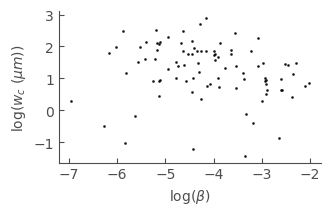

In [20]:
def wc_theory(diam=5,coneangle=3,deltaf=1,Y=10**4): #um, deg, kT/um^2, kT/um^2
    circ0=diam*np.pi #microns #dont adjust for particles sitting ON TOP of surface - diameter is already an upper estimate from cone fitting
    wc=(2*circ0)/(np.pi*np.deg2rad(coneangle))*np.sqrt(2*deltaf/Y) #units in sqrt cancel out, so wc and circ0 are same units
    return wc #microns
###### print('show log-log of data. units are preserved (sector angle in deg, wc in um)')
print('unfortunately to keep things consistent with theory we now have to work in radians')
fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['log_coneangle_rad'],data_df['log_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlabel('log('+r'$\beta$)')
ax.set_ylabel('log('+r'$w_c$'+' ('+r'$\mu m$'+')'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

print('find linear fit of log-log plot of upper bounds only. find max values at each integer sectorangle. we bin by sectorangle because binning by coneangle looks weird..')
def to_nearest(num, decimal):
    return round(num / decimal) * decimal

#only take max value at each binned sectorangle value, to nearest degree.
data_df['sectorangle_binned']=to_nearest(data_df['sectorangle'],1)
x_vals=np.unique(data_df['sectorangle_binned'])
y_vals=[]
for val in x_vals:
    y_vals+=[np.max(data_df[data_df['sectorangle_binned']==val]['log_width_um'])]
fit=pd.DataFrame({'x':x_vals,'y':y_vals})
fit=fit.dropna() #get rid of rows with missing y values for a given sectorangle
x_actual=[] #x was binned, now find the actual x value corresponding with the max width value
for row_idx in range(len(fit[['x','y']])):
    row=fit[['x','y']].iloc[row_idx]
    x=row['x']
    y=row['y']
    x_actual+=[data_df[(data_df['sectorangle_binned']==x)&(data_df['log_width_um']==y)]['coneangle_rad'].values[0]] #we binned by sector angle, but we want to store the CONE ANGLE in radians
fit['x']=np.log(x_actual) #set x to be the actual coneangle value in radians, not the binned sectorangle value. then find log.

In [21]:
points_to_fit=fit.copy() #save a copy to use later

Original approach: since we are interested in 1/beta behavior, enforce a slope of -1 on the linear fit of the log-log plot.

np.polyfit finds a line, but we want to enforce a slope of -1 to fit the theory. find line of best fit with slope of -1
plot fit line
plot the dislocation spacing expected by h=b/phi
plot the dislocation spacing expected by h=b/phi
plot the expected curve from elasticity theory, using carolines values
find wc from elasticity theory, for diam_min and diam_max
plot data fit with dislocation spacing curve and elasticity theory curve
plot the dislocation spacing expected by h=b/phi
plot the expected curve from elasticity theory, using carolines values
find wc from elasticity theory, for diam_min and diam_max


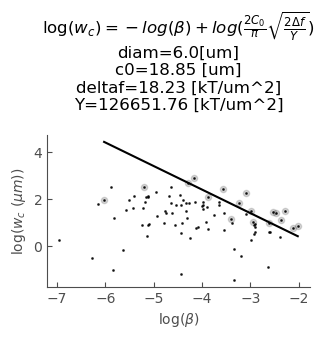

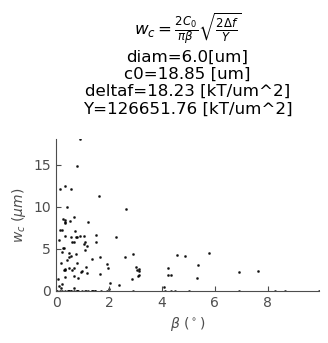

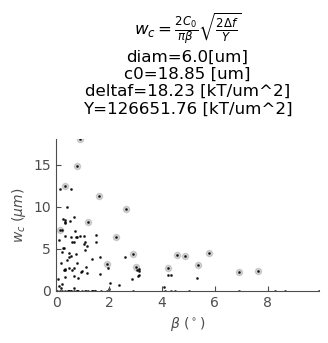

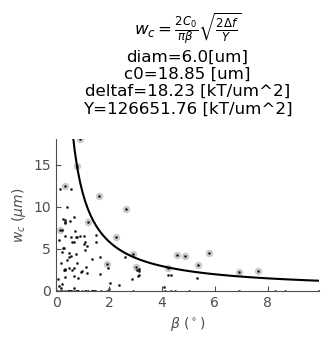

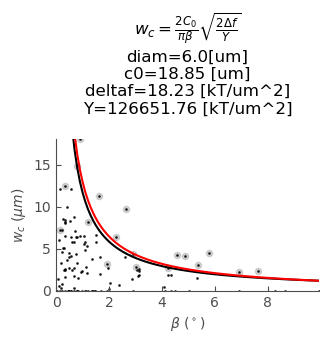

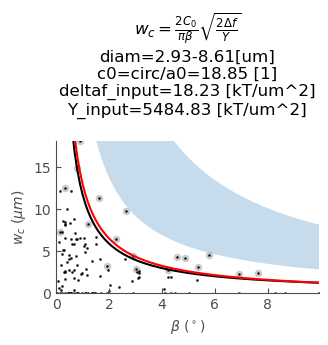

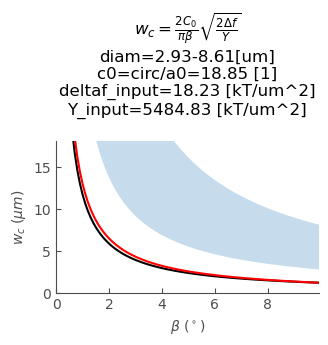

In [22]:
fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['log_coneangle_rad'],data_df['log_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlabel('log('+r'$\beta$)')
ax.set_ylabel('log('+r'$w_c$'+' ('+r'$\mu m$'+')'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

print('np.polyfit finds a line, but we want to enforce a slope of -1 to fit the theory. find line of best fit with slope of -1')
#https://stackoverflow.com/questions/33292969/linear-regression-with-specified-slope
# since y = a x + b, if we subtract a*x and focus on fitting the y intercept, we can get the full equation.
# y - a x = b << fit a value for b (horizontal line)

#a,b are values from fit. force a slope of -1.
fit['a']=-1
fit['y_line']=fit['y']-fit['a']*fit['x']
fit['b']=np.mean(fit['y_line']) #average y value is the same as finding y intercept of a horizontal line
fit['y_line']=fit['a']*fit['x']+fit['b']
fit['x_line']=fit['x']

print('plot fit line')
ax.plot(fit['x_line'], fit['y_line'],c='k')
ax.scatter(fit['x'],fit['y'],s=20,alpha=0.15,c='k')

diam=diam_input
a0=0.710 #um
c0=np.pi*diam #um
deltaf=deltaf_input
b=np.unique(fit['b'])[0]

Y=1/(((np.exp(b)*np.pi/(2*c0))**2)/(2*deltaf)) #kT/um^2

ax.set_title(r'log($w_c)=-log(\beta)+log(\frac{2C_0}{\pi}\sqrt{\frac{2\Delta f}{Y}})$' #r'log($w_c)=log(\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$)'
             +'\n'
             +'diam='+str(diam)+'[um]'
             +'\n'
            +'c0='+str(round(c0,2))+' [um]'
            +'\n'
            +'deltaf='+str(round(deltaf,2))+' [kT/um^2]'
            +'\n'
            +'Y='+str(round(Y,2))+' [kT/um^2]'
            +'\n') #             +r'$log(w_c)=log(\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$)'


#####
plt.savefig(dir_path+'/all grains/bands/plots/log-log.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/log-log.svg',bbox_inches='tight')
#####
#####
fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(diam)+'[um]'             
             +'\n'
            +'c0='+str(round(c0,2))+' [um]'
            +'\n'
            +'deltaf='+str(round(deltaf,2))+' [kT/um^2]'
            +'\n'
            +'Y='+str(round(Y,2))+' [kT/um^2]'
            +'\n') #   
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_raw.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_raw.svg',bbox_inches='tight')

#####
#####

fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)
ax.scatter(np.rad2deg(np.exp(fit['x'])),np.exp(fit['y']),s=20,alpha=0.15,c='k') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.

ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(diam)+'[um]'             
             +'\n'
            +'c0='+str(round(c0,2))+' [um]'
            +'\n'
            +'deltaf='+str(round(deltaf,2))+' [kT/um^2]'
            +'\n'
            +'Y='+str(round(Y,2))+' [kT/um^2]'
            +'\n') #   
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_unlabeled.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_unlabeled.svg',bbox_inches='tight')


fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

a=np.unique(fit['a'])
b=np.unique(fit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='k') #new values for curve that are smoother

ax.scatter(np.rad2deg(np.exp(fit['x'])),np.exp(fit['y']),s=20,alpha=0.15,c='k') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.
ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(diam)+'[um]'             
             +'\n'
            +'c0='+str(round(c0,2))+' [um]'
            +'\n'
            +'deltaf='+str(round(deltaf,2))+' [kT/um^2]'
            +'\n'
            +'Y='+str(round(Y,2))+' [kT/um^2]'
            +'\n') #             +r'$w_c=\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$'

#####
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle.svg',bbox_inches='tight')

###
fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

a=np.unique(fit['a'])
b=np.unique(fit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='k') #new values for curve that are smoother

ax.scatter(np.rad2deg(np.exp(fit['x'])),np.exp(fit['y']),s=20,alpha=0.15,c='k') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.
ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(diam)+'[um]'             
             +'\n'
            +'c0='+str(round(c0,2))+' [um]'
            +'\n'
            +'deltaf='+str(round(deltaf,2))+' [kT/um^2]'
            +'\n'
            +'Y='+str(round(Y,2))+' [kT/um^2]'
            +'\n') #             +r'$w_c=\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$'

print('plot the dislocation spacing expected by h=b/phi')
a0=0.710 #um
coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates
sectorangle_rad=2*np.pi*np.sin(np.deg2rad(coneangle)/2) #in rad
y=a0/np.tan(sectorangle_rad) #um. h=b/phi (small angle approx) or h=b/tan(phi)
x=coneangle
ax.plot(x,y,c='red')
#####
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_dislocations.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_dislocations.svg',bbox_inches='tight')

###
###
fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

a=np.unique(fit['a'])
b=np.unique(fit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='k') #new values for curve that are smoother

ax.scatter(np.rad2deg(np.exp(fit['x'])),np.exp(fit['y']),s=20,alpha=0.15,c='k') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.
ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(diam)+'[um]'             
             +'\n'
            +'c0='+str(round(c0,2))+' [um]'
            +'\n'
            +'deltaf='+str(round(deltaf,2))+' [kT/um^2]'
            +'\n'
            +'Y='+str(round(Y,2))+' [kT/um^2]'
            +'\n') #             +r'$w_c=\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$'

print('plot the dislocation spacing expected by h=b/phi')
a0=0.710 #um
coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates
sectorangle_rad=2*np.pi*np.sin(np.deg2rad(coneangle)/2) #in rad
y=a0/np.tan(sectorangle_rad) #um. h=b/phi (small angle approx) or h=b/tan(phi)
x=coneangle
ax.plot(x,y,c='red')

print('plot the expected curve from elasticity theory, using carolines values')
diam_min=np.min(data_df['band_diam_um'])
diam_max=np.max(data_df['band_diam_um'])

coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates

print('find wc from elasticity theory, for diam_min and diam_max')
wc_df_min=pd.DataFrame({'coneangle':coneangle,'sectorangle':np.rad2deg(2*np.pi*np.sin(np.deg2rad(x)/2)),
                    'wc':wc_theory(diam=diam_min,coneangle=coneangle,deltaf=deltaf_input,Y=Y_input)})
wc_df_max=pd.DataFrame({'coneangle':coneangle,'sectorangle':np.rad2deg(2*np.pi*np.sin(np.deg2rad(x)/2)),
                    'wc':wc_theory(diam=diam_max,coneangle=coneangle,deltaf=deltaf_input,Y=Y_input)})
ax.fill_between(wc_df_min['coneangle'],wc_df_min['wc'],wc_df_max['wc'],alpha=0.25)

ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(round(diam_min,2))+'-'+str(round(diam_max,2))+'[um]'             
             +'\n'
            +'c0=circ/a0='+str(round(c0,2))+' [1]'
            +'\n'
            +'deltaf_input='+str(round(deltaf_input,2))+' [kT/um^2]'
            +'\n'
            +'Y_input='+str(round(Y_input,2))+' [kT/um^2]'
            +'\n') #             +r'$w_c=\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$'

#####
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_dislocations-elasticity.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_dislocations-elasticity.svg',bbox_inches='tight')

###
print('plot data fit with dislocation spacing curve and elasticity theory curve')
fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

# ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

a=np.unique(fit['a'])
b=np.unique(fit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='k') #new values for curve that are smoother

print('plot the dislocation spacing expected by h=b/phi')
a0=0.710 #um
coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates
sectorangle_rad=2*np.pi*np.sin(np.deg2rad(coneangle)/2) #in rad
y=a0/np.tan(sectorangle_rad) #um. h=b/phi (small angle approx) or h=b/tan(phi)
x=coneangle
ax.plot(x,y,c='red')

print('plot the expected curve from elasticity theory, using carolines values')
diam_min=np.min(data_df['band_diam_um'])
diam_max=np.max(data_df['band_diam_um'])

coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates

print('find wc from elasticity theory, for diam_min and diam_max')
wc_df_min=pd.DataFrame({'coneangle':coneangle,'sectorangle':np.rad2deg(2*np.pi*np.sin(np.deg2rad(x)/2)),
                    'wc':wc_theory(diam=diam_min,coneangle=coneangle,deltaf=deltaf_input,Y=Y_input)})
wc_df_max=pd.DataFrame({'coneangle':coneangle,'sectorangle':np.rad2deg(2*np.pi*np.sin(np.deg2rad(x)/2)),
                    'wc':wc_theory(diam=diam_max,coneangle=coneangle,deltaf=deltaf_input,Y=Y_input)})
ax.fill_between(wc_df_min['coneangle'],wc_df_min['wc'],wc_df_max['wc'],alpha=0.25)

ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(round(diam_min,2))+'-'+str(round(diam_max,2))+'[um]'             
             +'\n'
            +'c0=circ/a0='+str(round(c0,2))+' [1]'
            +'\n'
            +'deltaf_input='+str(round(deltaf_input,2))+' [kT/um^2]'
            +'\n'
            +'Y_input='+str(round(Y_input,2))+' [kT/um^2]'
            +'\n') #             +r'$w_c=\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$'

#####
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_curves.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_curves.svg',bbox_inches='tight')

In [23]:
#Based on reviewer comment, explore what happens if we exclude the first few points which might be lower than expected.
bestfit=pd.DataFrame([])
bestfit['x']=points_to_fit['x']
bestfit['y']=points_to_fit['y']

a_newfit,b_newfit=np.polyfit(bestfit['x'],bestfit['y'],1)

bestfit['a']=a_newfit
bestfit['b']=b_newfit
bestfit['x_line']=points_to_fit['x']
bestfit['y_line']=a_newfit*points_to_fit['x']+b_newfit

#Based on reviewer comment, explore what happens if we don't constrain to -1. What's the best fit now?
trimfit=pd.DataFrame([])
trimidx=3
trimfit['x']=points_to_fit['x'].iloc[trimidx:]
trimfit['y']=points_to_fit['y'].iloc[trimidx:]

a_newfit,b_newfit=np.polyfit(trimfit['x'],trimfit['y'],1)

trimfit['a']=a_newfit
trimfit['b']=b_newfit
trimfit['x_line']=points_to_fit['x'].iloc[trimidx:]
trimfit['y_line']=a_newfit*points_to_fit['x'].iloc[trimidx:]+b_newfit

Plot with the new curves.

plot original fit line
plot new best fit line
plot trimmed fit line
original fit exponent (black) =  [-1]
new best fit exponent (magenta) =  [-0.43396908]
trimmed fit exponent (cyan) =  [-0.78245835]
plot the dislocation spacing expected by h=b/phi
plot the dislocation spacing expected by h=b/phi
plot the expected curve from elasticity theory, using carolines values
find wc from elasticity theory, for diam_min and diam_max
plot data fit with dislocation spacing curve and elasticity theory curve
plot the dislocation spacing expected by h=b/phi
plot the expected curve from elasticity theory, using carolines values
find wc from elasticity theory, for diam_min and diam_max


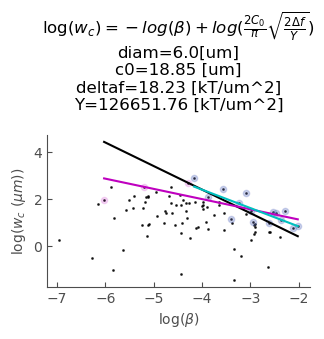

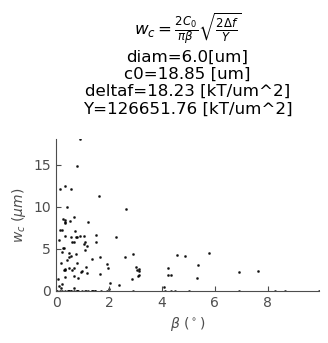

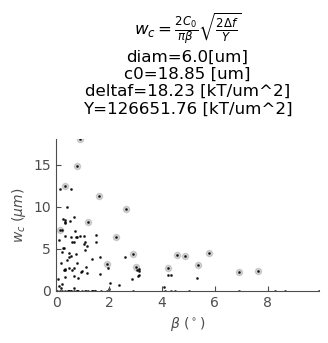

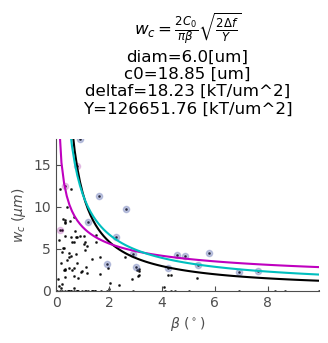

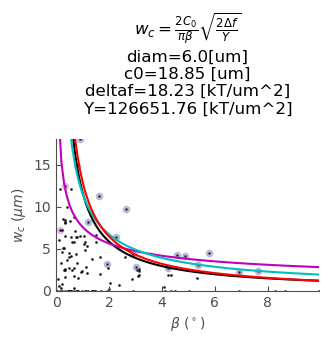

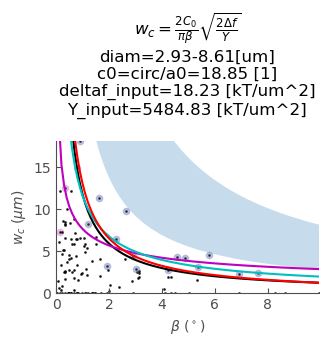

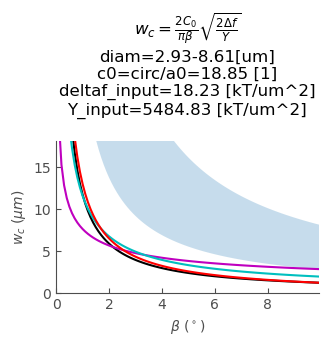

In [26]:
fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['log_coneangle_rad'],data_df['log_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlabel('log('+r'$\beta$)')
ax.set_ylabel('log('+r'$w_c$'+' ('+r'$\mu m$'+')'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

# print('np.polyfit finds a line, but we want to enforce a slope of -1 to fit the theory. find line of best fit with slope of -1')
# #https://stackoverflow.com/questions/33292969/linear-regression-with-specified-slope
# # since y = a x + b, if we subtract a*x and focus on fitting the y intercept, we can get the full equation.
# # y - a x = b << fit a value for b (horizontal line)

# #a,b are values from fit. force a slope of -1.
# fit['a']=-1
# fit['y_line']=fit['y']-fit['a']*fit['x']
# fit['b']=np.mean(fit['y_line']) #average y value is the same as finding y intercept of a horizontal line
# fit['y_line']=fit['a']*fit['x']+fit['b']
# fit['x_line']=fit['x']

print('plot original fit line')
ax.plot(fit['x_line'], fit['y_line'],c='k')
ax.scatter(fit['x'],fit['y'],s=20,alpha=0,c='k') #reduce alpha

print('plot new best fit line')
ax.plot(bestfit['x_line'], bestfit['y_line'],c='m')
ax.scatter(bestfit['x'],bestfit['y'],s=20,alpha=0.15,c='m')

print('plot trimmed fit line')
ax.plot(trimfit['x_line'], trimfit['y_line'],c='c')
ax.scatter(trimfit['x'],trimfit['y'],s=20,alpha=0.15,c='c')

diam=diam_input
a0=0.710 #um
c0=np.pi*diam #um
deltaf=deltaf_input
b=np.unique(fit['b'])[0]

Y=1/(((np.exp(b)*np.pi/(2*c0))**2)/(2*deltaf)) #kT/um^2

ax.set_title(r'log($w_c)=-log(\beta)+log(\frac{2C_0}{\pi}\sqrt{\frac{2\Delta f}{Y}})$' #r'log($w_c)=log(\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$)'
             +'\n'
             +'diam='+str(diam)+'[um]'
             +'\n'
            +'c0='+str(round(c0,2))+' [um]'
            +'\n'
            +'deltaf='+str(round(deltaf,2))+' [kT/um^2]'
            +'\n'
            +'Y='+str(round(Y,2))+' [kT/um^2]'
            +'\n') #             +r'$log(w_c)=log(\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$)'


#####
plt.savefig(dir_path+'/all grains/bands/plots/log-log_aug2024.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/log-log_aug2024.svg',bbox_inches='tight')
#####
#####
fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(diam)+'[um]'             
             +'\n'
            +'c0='+str(round(c0,2))+' [um]'
            +'\n'
            +'deltaf='+str(round(deltaf,2))+' [kT/um^2]'
            +'\n'
            +'Y='+str(round(Y,2))+' [kT/um^2]'
            +'\n') #   
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_raw_aug2024.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_raw_aug2024.svg',bbox_inches='tight')

#####
#####

fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)
ax.scatter(np.rad2deg(np.exp(fit['x'])),np.exp(fit['y']),s=20,alpha=0.15,c='k') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.

ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(diam)+'[um]'             
             +'\n'
            +'c0='+str(round(c0,2))+' [um]'
            +'\n'
            +'deltaf='+str(round(deltaf,2))+' [kT/um^2]'
            +'\n'
            +'Y='+str(round(Y,2))+' [kT/um^2]'
            +'\n') #   
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_unlabeled_aug2024.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_unlabeled_aug2024.svg',bbox_inches='tight')


fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

#plot original fit
a=np.unique(fit['a'])
print('original fit exponent (black) = ',a)
b=np.unique(fit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='k') #new values for curve that are smoother

ax.scatter(np.rad2deg(np.exp(fit['x'])),np.exp(fit['y']),s=20,alpha=0.05,c='k') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.

#plot new best fit
a=np.unique(bestfit['a'])
print('new best fit exponent (magenta) = ',a)
b=np.unique(bestfit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='m') #new values for curve that are smoother

ax.scatter(np.rad2deg(np.exp(bestfit['x'])),np.exp(bestfit['y']),s=20,alpha=0.15,c='m') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.

#plot trimmed fit
a=np.unique(trimfit['a'])
print('trimmed fit exponent (cyan) = ',a)
b=np.unique(trimfit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='c') #new values for curve that are smoother

ax.scatter(np.rad2deg(np.exp(trimfit['x'])),np.exp(trimfit['y']),s=20,alpha=0.15,c='c') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.
############
############
ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(diam)+'[um]'             
             +'\n'
            +'c0='+str(round(c0,2))+' [um]'
            +'\n'
            +'deltaf='+str(round(deltaf,2))+' [kT/um^2]'
            +'\n'
            +'Y='+str(round(Y,2))+' [kT/um^2]'
            +'\n') #             +r'$w_c=\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$'

#####
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_aug2024.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_aug2024.svg',bbox_inches='tight')

###
fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

# a=np.unique(fit['a'])
# b=np.unique(fit['b'])
# x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
# y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
# ax.plot(x, y,c='k') #new values for curve that are smoother

# ax.scatter(np.rad2deg(np.exp(fit['x'])),np.exp(fit['y']),s=20,alpha=0.15,c='k') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.
#plot original fit
a=np.unique(fit['a'])
b=np.unique(fit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='k') #new values for curve that are smoother

ax.scatter(np.rad2deg(np.exp(fit['x'])),np.exp(fit['y']),s=20,alpha=0.05,c='k') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.

#plot new best fit
a=np.unique(bestfit['a'])
b=np.unique(bestfit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='m') #new values for curve that are smoother

ax.scatter(np.rad2deg(np.exp(bestfit['x'])),np.exp(bestfit['y']),s=20,alpha=0.15,c='m') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.

#plot trimmed fit
a=np.unique(trimfit['a'])
b=np.unique(trimfit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='c') #new values for curve that are smoother

ax.scatter(np.rad2deg(np.exp(trimfit['x'])),np.exp(trimfit['y']),s=20,alpha=0.15,c='c') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.
ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(diam)+'[um]'             
             +'\n'
            +'c0='+str(round(c0,2))+' [um]'
            +'\n'
            +'deltaf='+str(round(deltaf,2))+' [kT/um^2]'
            +'\n'
            +'Y='+str(round(Y,2))+' [kT/um^2]'
            +'\n') #             +r'$w_c=\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$'

print('plot the dislocation spacing expected by h=b/phi')
a0=0.710 #um
coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates
sectorangle_rad=2*np.pi*np.sin(np.deg2rad(coneangle)/2) #in rad
y=a0/np.tan(sectorangle_rad) #um. h=b/phi (small angle approx) or h=b/tan(phi)
x=coneangle
ax.plot(x,y,c='red')
#####
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_dislocations_aug2024.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_dislocations_aug2024.svg',bbox_inches='tight')

###
###
fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

# a=np.unique(fit['a'])
# b=np.unique(fit['b'])
# x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
# y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
# ax.plot(x, y,c='k') #new values for curve that are smoother

# ax.scatter(np.rad2deg(np.exp(fit['x'])),np.exp(fit['y']),s=20,alpha=0.15,c='k') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.
#plot original fit
a=np.unique(fit['a'])
b=np.unique(fit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='k') #new values for curve that are smoother

ax.scatter(np.rad2deg(np.exp(fit['x'])),np.exp(fit['y']),s=20,alpha=0.05,c='k') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.

#plot new best fit
a=np.unique(bestfit['a'])
b=np.unique(bestfit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='m') #new values for curve that are smoother

ax.scatter(np.rad2deg(np.exp(bestfit['x'])),np.exp(bestfit['y']),s=20,alpha=0.15,c='m') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.

#plot trimmed fit
a=np.unique(trimfit['a'])
b=np.unique(trimfit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='c') #new values for curve that are smoother

ax.scatter(np.rad2deg(np.exp(trimfit['x'])),np.exp(trimfit['y']),s=20,alpha=0.15,c='c') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.
ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(diam)+'[um]'             
             +'\n'
            +'c0='+str(round(c0,2))+' [um]'
            +'\n'
            +'deltaf='+str(round(deltaf,2))+' [kT/um^2]'
            +'\n'
            +'Y='+str(round(Y,2))+' [kT/um^2]'
            +'\n') #             +r'$w_c=\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$'

print('plot the dislocation spacing expected by h=b/phi')
a0=0.710 #um
coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates
sectorangle_rad=2*np.pi*np.sin(np.deg2rad(coneangle)/2) #in rad
y=a0/np.tan(sectorangle_rad) #um. h=b/phi (small angle approx) or h=b/tan(phi)
x=coneangle
ax.plot(x,y,c='red')

print('plot the expected curve from elasticity theory, using carolines values')
diam_min=np.min(data_df['band_diam_um'])
diam_max=np.max(data_df['band_diam_um'])

coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates

print('find wc from elasticity theory, for diam_min and diam_max')
wc_df_min=pd.DataFrame({'coneangle':coneangle,'sectorangle':np.rad2deg(2*np.pi*np.sin(np.deg2rad(x)/2)),
                    'wc':wc_theory(diam=diam_min,coneangle=coneangle,deltaf=deltaf_input,Y=Y_input)})
wc_df_max=pd.DataFrame({'coneangle':coneangle,'sectorangle':np.rad2deg(2*np.pi*np.sin(np.deg2rad(x)/2)),
                    'wc':wc_theory(diam=diam_max,coneangle=coneangle,deltaf=deltaf_input,Y=Y_input)})
ax.fill_between(wc_df_min['coneangle'],wc_df_min['wc'],wc_df_max['wc'],alpha=0.25)

ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(round(diam_min,2))+'-'+str(round(diam_max,2))+'[um]'             
             +'\n'
            +'c0=circ/a0='+str(round(c0,2))+' [1]'
            +'\n'
            +'deltaf_input='+str(round(deltaf_input,2))+' [kT/um^2]'
            +'\n'
            +'Y_input='+str(round(Y_input,2))+' [kT/um^2]'
            +'\n') #             +r'$w_c=\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$'

#####
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_dislocations-elasticity_aug2024.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_dislocations-elasticity_aug2024.svg',bbox_inches='tight')

###
print('plot data fit with dislocation spacing curve and elasticity theory curve')
fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

# ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

# a=np.unique(fit['a'])
# b=np.unique(fit['b'])
# x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
# y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
# ax.plot(x, y,c='k') #new values for curve that are smoother
#plot original fit
a=np.unique(fit['a'])
b=np.unique(fit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='k') #new values for curve that are smoother

# ax.scatter(np.rad2deg(np.exp(fit['x'])),np.exp(fit['y']),s=20,alpha=0.05,c='k') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.

#plot new best fit
a=np.unique(bestfit['a'])
b=np.unique(bestfit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='m') #new values for curve that are smoother

# ax.scatter(np.rad2deg(np.exp(bestfit['x'])),np.exp(bestfit['y']),s=20,alpha=0.15,c='m') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.

#plot trimmed fit
a=np.unique(trimfit['a'])
b=np.unique(trimfit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='c') #new values for curve that are smoother

# ax.scatter(np.rad2deg(np.exp(trimfit['x'])),np.exp(trimfit['y']),s=20,alpha=0.15,c='c') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.

print('plot the dislocation spacing expected by h=b/phi')
a0=0.710 #um
coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates
sectorangle_rad=2*np.pi*np.sin(np.deg2rad(coneangle)/2) #in rad
y=a0/np.tan(sectorangle_rad) #um. h=b/phi (small angle approx) or h=b/tan(phi)
x=coneangle
ax.plot(x,y,c='red')

print('plot the expected curve from elasticity theory, using carolines values')
diam_min=np.min(data_df['band_diam_um'])
diam_max=np.max(data_df['band_diam_um'])

coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates

print('find wc from elasticity theory, for diam_min and diam_max')
wc_df_min=pd.DataFrame({'coneangle':coneangle,'sectorangle':np.rad2deg(2*np.pi*np.sin(np.deg2rad(x)/2)),
                    'wc':wc_theory(diam=diam_min,coneangle=coneangle,deltaf=deltaf_input,Y=Y_input)})
wc_df_max=pd.DataFrame({'coneangle':coneangle,'sectorangle':np.rad2deg(2*np.pi*np.sin(np.deg2rad(x)/2)),
                    'wc':wc_theory(diam=diam_max,coneangle=coneangle,deltaf=deltaf_input,Y=Y_input)})
ax.fill_between(wc_df_min['coneangle'],wc_df_min['wc'],wc_df_max['wc'],alpha=0.25)

ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(round(diam_min,2))+'-'+str(round(diam_max,2))+'[um]'             
             +'\n'
            +'c0=circ/a0='+str(round(c0,2))+' [1]'
            +'\n'
            +'deltaf_input='+str(round(deltaf_input,2))+' [kT/um^2]'
            +'\n'
            +'Y_input='+str(round(Y_input,2))+' [kT/um^2]'
            +'\n') #             +r'$w_c=\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$'

#####
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_curves_aug2024.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_curves_aug2024.svg',bbox_inches='tight')

plot data fit with elasticity theory curve only
plot the expected curve from elasticity theory, using carolines values
find wc from elasticity theory, for diam_min and diam_max


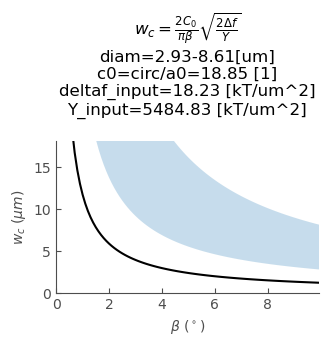

In [47]:
print('plot data fit with elasticity theory curve only')
fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

# ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

a=np.unique(fit['a'])
b=np.unique(fit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='k') #new values for curve that are smoother

# ax.scatter(np.rad2deg(np.exp(fit['x'])),np.exp(fit['y']),s=20,alpha=0.15,c='k') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.
# ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
#              +'\n'
#              +'diam='+str(diam)+'[um]'             
#              +'\n'
#             +'c0=circ/a0='+str(round(c0,2))+' [1]'
#             +'\n'
#             +'deltaf='+str(round(deltaf,2))+' [kT]'
#             +'\n'
#             +'Y='+str(round(Y,2))+' [kT/um^2]'
#             +'\n') #             +r'$w_c=\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$'


# print('plot the dislocation spacing expected by h=b/phi')
# a0=0.710 #um
# coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates
# sectorangle_rad=2*np.pi*np.sin(np.deg2rad(coneangle)/2) #in rad
# y=a0/np.tan(sectorangle_rad) #um. h=b/phi (small angle approx) or h=b/tan(phi)
# x=coneangle
# ax.plot(x,y,c='red')

print('plot the expected curve from elasticity theory, using carolines values')
# a0=0.710 #um
# coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates
# sectorangle_rad=2*np.pi*np.sin(np.deg2rad(coneangle)/2) #in rad
# y=a0/np.tan(sectorangle_rad) #um. h=b/phi (small angle approx) or h=b/tan(phi)
# x=coneangle
# ax.plot(x,y,c='red')
diam_min=np.min(data_df['band_diam_um'])
diam_max=np.max(data_df['band_diam_um'])

coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates

print('find wc from elasticity theory, for diam_min and diam_max')
wc_df_min=pd.DataFrame({'coneangle':coneangle,'sectorangle':np.rad2deg(2*np.pi*np.sin(np.deg2rad(x)/2)),
                    'wc':wc_theory(diam=diam_min,coneangle=coneangle,deltaf=deltaf_input,Y=Y_input)})
wc_df_max=pd.DataFrame({'coneangle':coneangle,'sectorangle':np.rad2deg(2*np.pi*np.sin(np.deg2rad(x)/2)),
                    'wc':wc_theory(diam=diam_max,coneangle=coneangle,deltaf=deltaf_input,Y=Y_input)})
ax.fill_between(wc_df_min['coneangle'],wc_df_min['wc'],wc_df_max['wc'],alpha=0.25)

ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(round(diam_min,2))+'-'+str(round(diam_max,2))+'[um]'             
             +'\n'
            +'c0=circ/a0='+str(round(c0,2))+' [1]'
            +'\n'
            +'deltaf_input='+str(round(deltaf_input,2))+' [kT/um^2]'
            +'\n'
            +'Y_input='+str(round(Y_input,2))+' [kT/um^2]'
            +'\n') #             +r'$w_c=\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$'

#####
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_curves_blue.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle_curves_blue.svg',bbox_inches='tight')

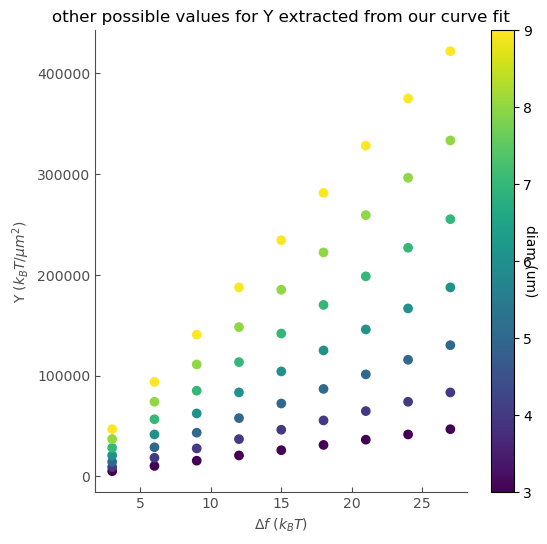

In [48]:
diam_list=np.arange(3,9+1,1)
deltaf_list=np.arange(3,27+3,3)
b=np.unique(fit['b'])[0]

Y_list=[]
diam_list2=[]
c0_list2=[]
deltaf_list2=[]
for diam in diam_list:
    for deltaf in deltaf_list:
        # for c0 in c0_list:
        diam_list2+=[diam]
        c0=np.pi*diam #um       
        c0_list2+=[c0]
        deltaf_list2+=[deltaf] #kT/um^2
        Y_list+=[1/(((np.exp(b)*np.pi/(2*c0))**2)/(2*deltaf))] #kT/um^2            
Y_df=pd.DataFrame({'diam':diam_list2,'c0':c0_list2,'deltaf':deltaf_list2,'Y':Y_list})

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
plot=ax.scatter(Y_df['deltaf'],Y_df['Y'],c=Y_df['diam'])
cbar=plt.colorbar(plot)
cbar.ax.set_ylabel('diam (um)', rotation=270)
ax.set_xlabel(r'$\Delta f\ (k_B T)$')
ax.set_ylabel('Y '+r'$(k_B T/\mu m^2)$')
ax.set_title('other possible values for Y extracted from our curve fit')

axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

plt.savefig(dir_path+'/all grains/bands/plots/Y_values.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/Y_values.svg',bbox_inches='tight')

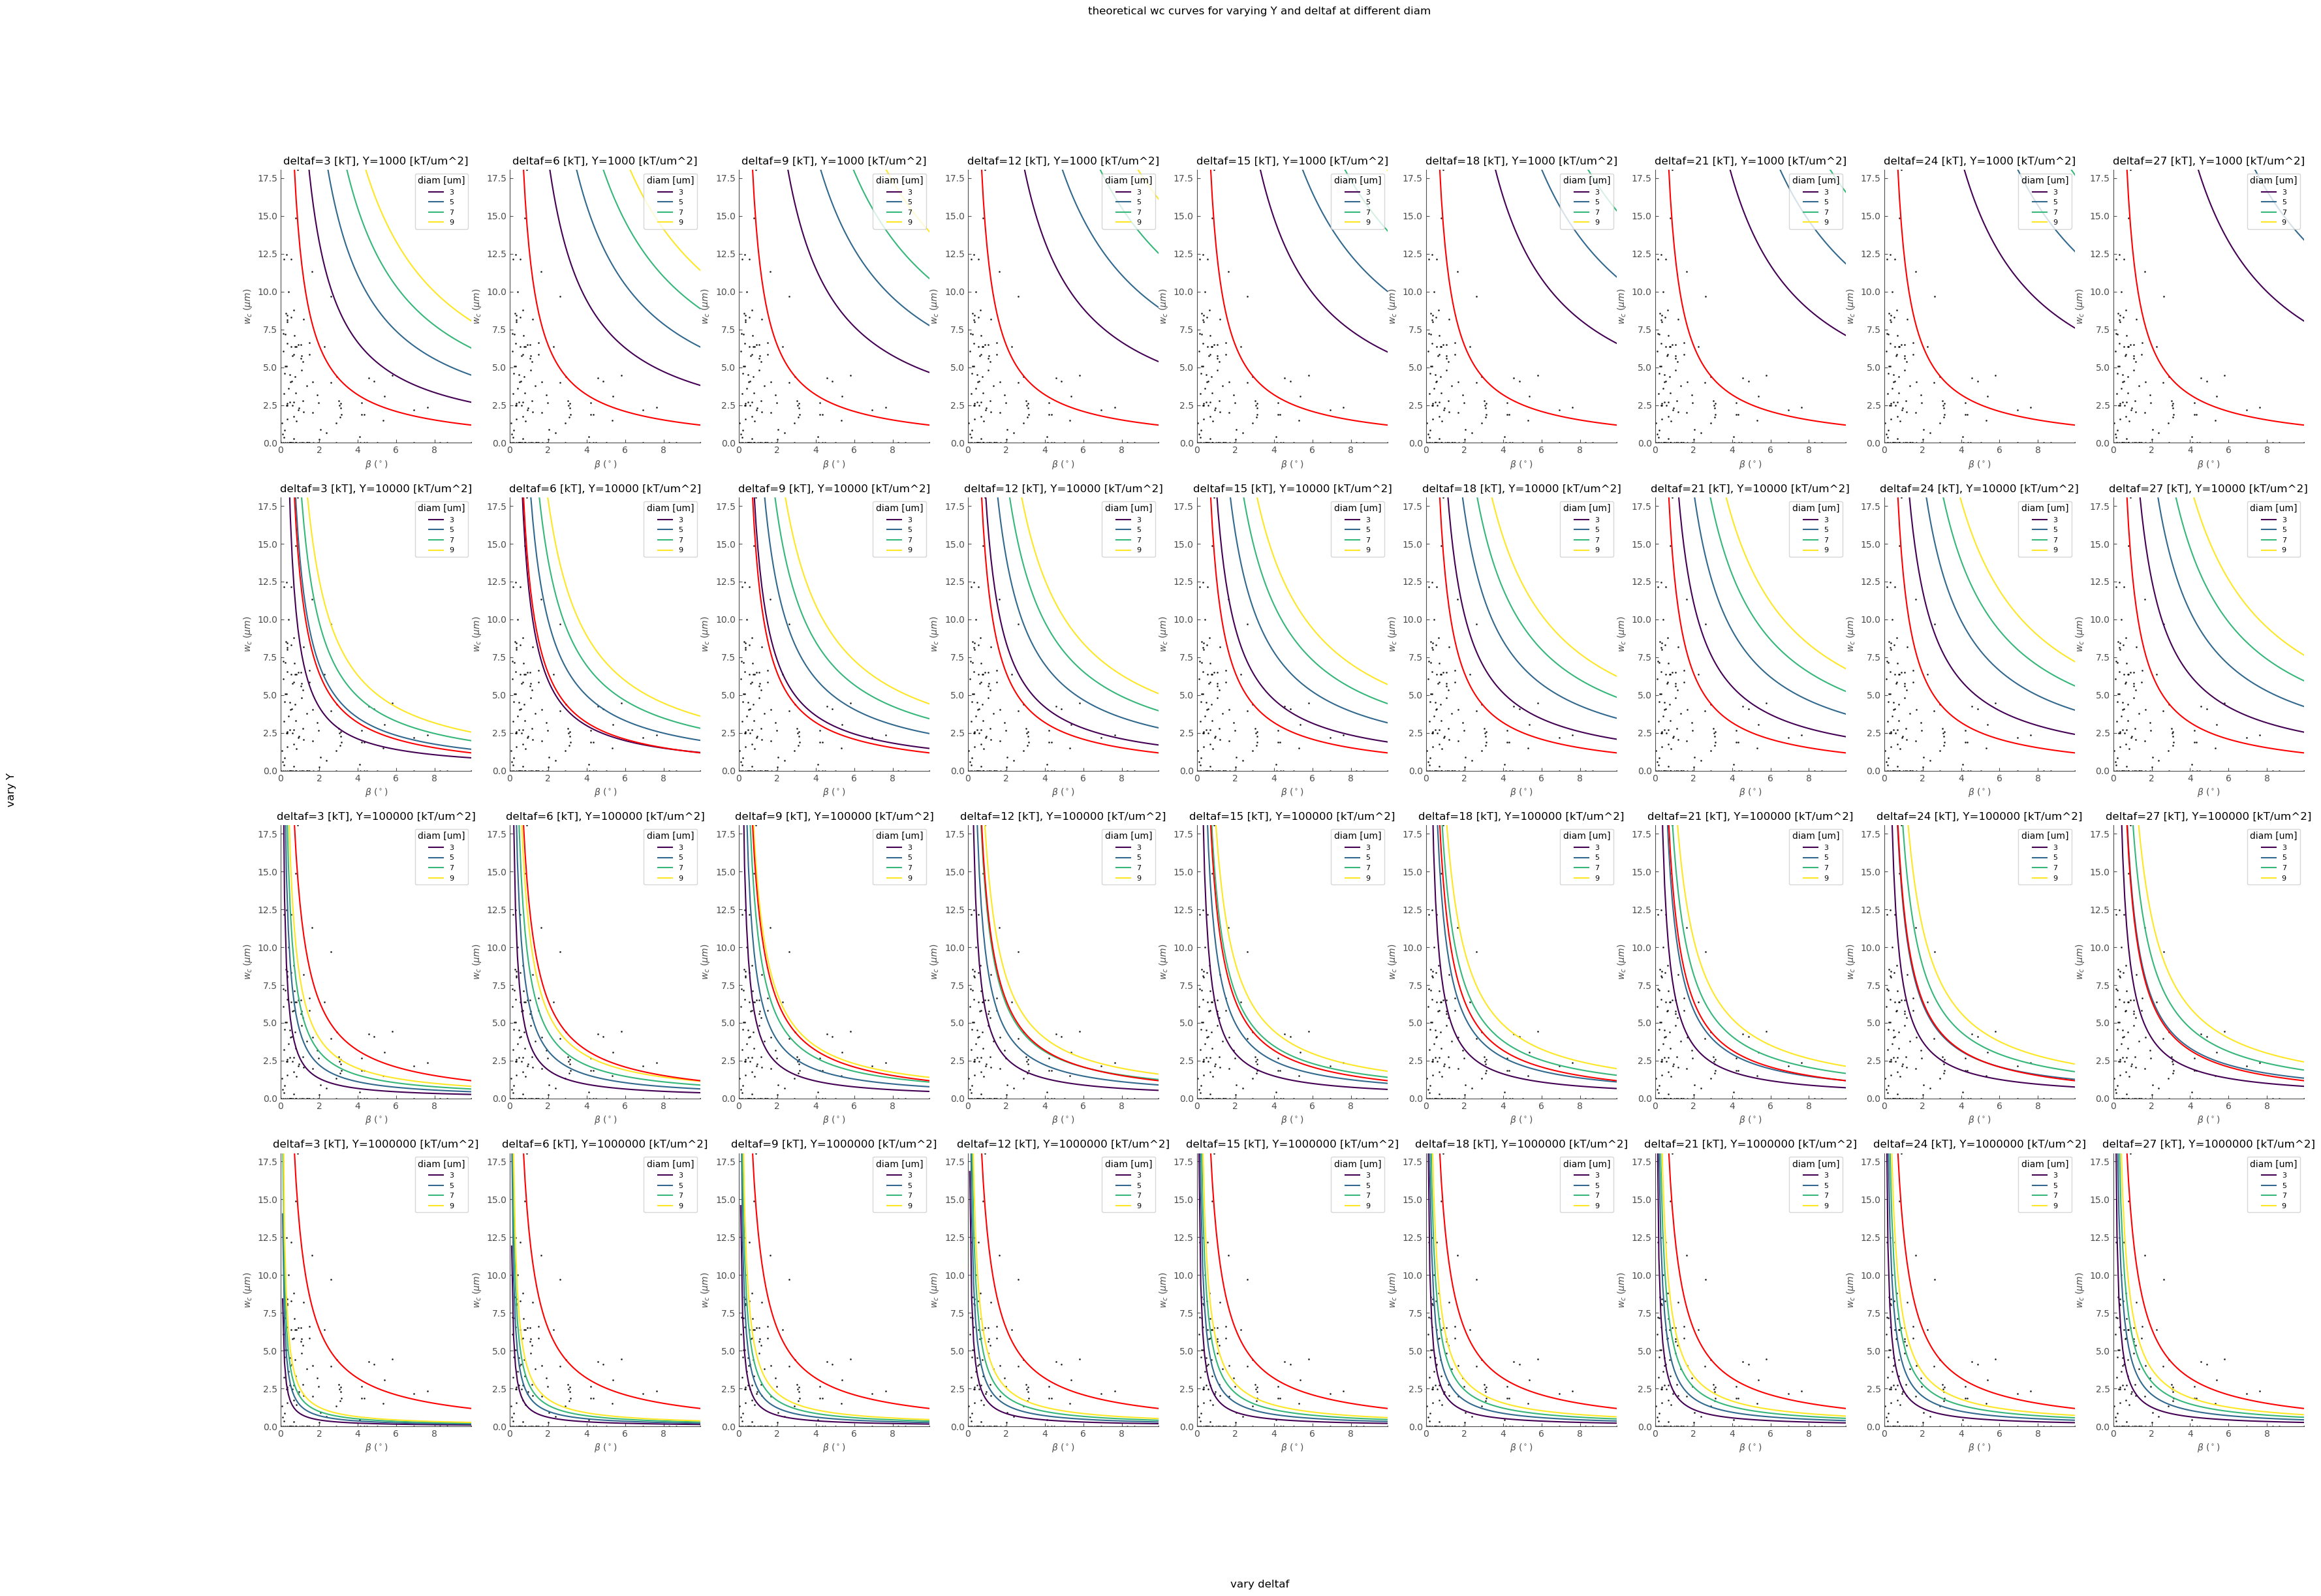

In [49]:
def raw_data(ax):
    ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
    ax.set_xlim(0,np.max(data_df['coneangle']))
    ax.set_ylim(0,np.max(data_df['band_width_um']))
    ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
    ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
    axis_color='0.3'
    ax.tick_params(direction="in",colors=axis_color)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(axis_color)
    ax.spines['left'].set_color(axis_color)
    ax.xaxis.label.set_color(axis_color)
    ax.yaxis.label.set_color(axis_color)

    # a=np.unique(fit['a'])
    # b=np.unique(fit['b'])
    # x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
    # y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
    # # ax.plot(np.exp(fit['x_line']), np.exp(fit['y_line'])) #values here are right but spaced too far apart
    # ax.plot(x, y) #new values for curve that are smoother

    # ax.scatter(np.rad2deg(np.exp(fit['x'])),np.exp(fit['y']),s=20,alpha=0.25) #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.
    ax.set_title('deltaf='+str(round(deltaf,2))+' [kT]' #r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'+'\n' #                 +'diam='+str(diam)+'[um]'         # +'c0='+str(round(c0,2))+' [1]'
                 +', Y='+str(round(Y,2))+' [kT/um^2]') #             +r'$w_c=\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$'
    return ax

diam_list=np.arange(3,11,2)
deltaf_list=np.arange(3,30,3)
# Y_list=np.arange(np.round(np.min(Y_df['Y']),-2),np.round(np.max(Y_df['Y']),-2)+100000,100000)
Y_list=np.array([10**3,10**4,10**5,10**6])

norm=colors.Normalize(vmin=diam_list[0],vmax=diam_list[-1]) #normalize ij_angle values
cmap=plt.cm.viridis

m=len(Y_list)
n=len(deltaf_list)
fig,axs=plt.subplots(m,n,figsize=(40,25))

for Y_idx in range(len(Y_list)):    
    for deltaf_idx in range(len(deltaf_list)):
        Y=Y_list[Y_idx]
        deltaf=deltaf_list[deltaf_idx]
        ax=axs[Y_idx,deltaf_idx]
        ax=raw_data(ax)
        for diam in diam_list:
            x=np.arange(coneangle_lim[0]+0.1,coneangle_lim[1]+0.1,0.1)
            wc_df=pd.DataFrame({'coneangle':x,'sectorangle':np.rad2deg(2*np.pi*np.sin(np.deg2rad(x)/2)),
                                'wc':wc_theory(diam=diam,coneangle=x,deltaf=deltaf,Y=Y)})
            ax.plot(wc_df['coneangle'],wc_df['wc'],alpha=1,markersize=1,label=diam,c=cmap(norm(diam))) #,c='k'
        ax.legend(title='diam [um]',loc='upper right',prop=dict(size=8))
        # print('plot the dislocation spacing expected by h=b/phi')
        a0=0.710 #um
        coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates
        sectorangle_rad=2*np.pi*np.sin(np.deg2rad(coneangle)/2) #in rad
        y=a0/np.tan(sectorangle_rad) #um. h=b/phi (small angle approx) or h=b/tan(phi)
        x=coneangle
        ax.plot(x,y,c='red')            
        
        
fig.suptitle('theoretical wc curves for varying Y and deltaf at different diam')
fig.supxlabel('vary deltaf')
fig.supylabel('vary Y')
#####
plt.savefig(dir_path+'/all grains/bands/plots/fit_curves.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/fit_curves.svg',bbox_inches='tight')

highlight and show select points


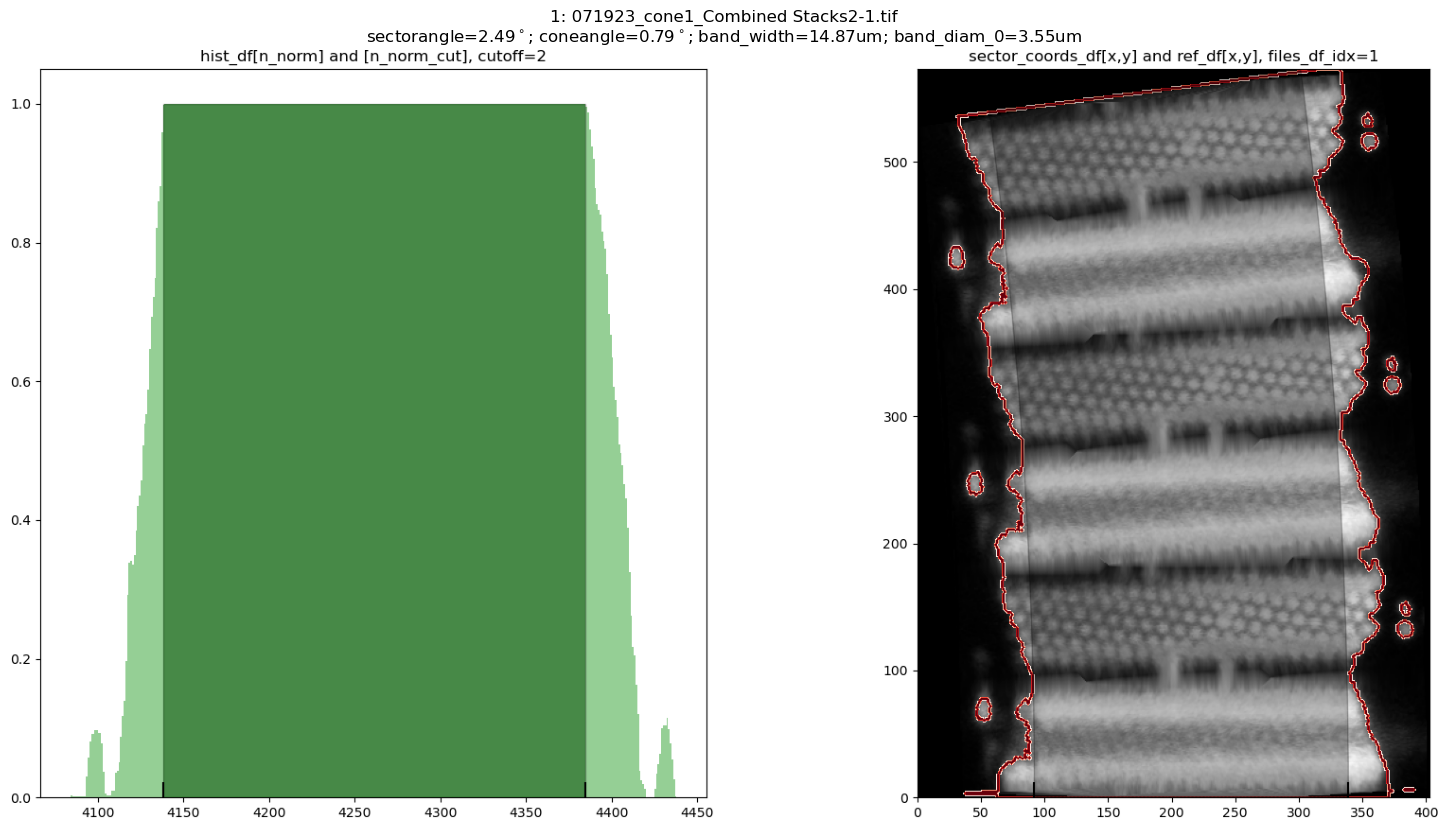

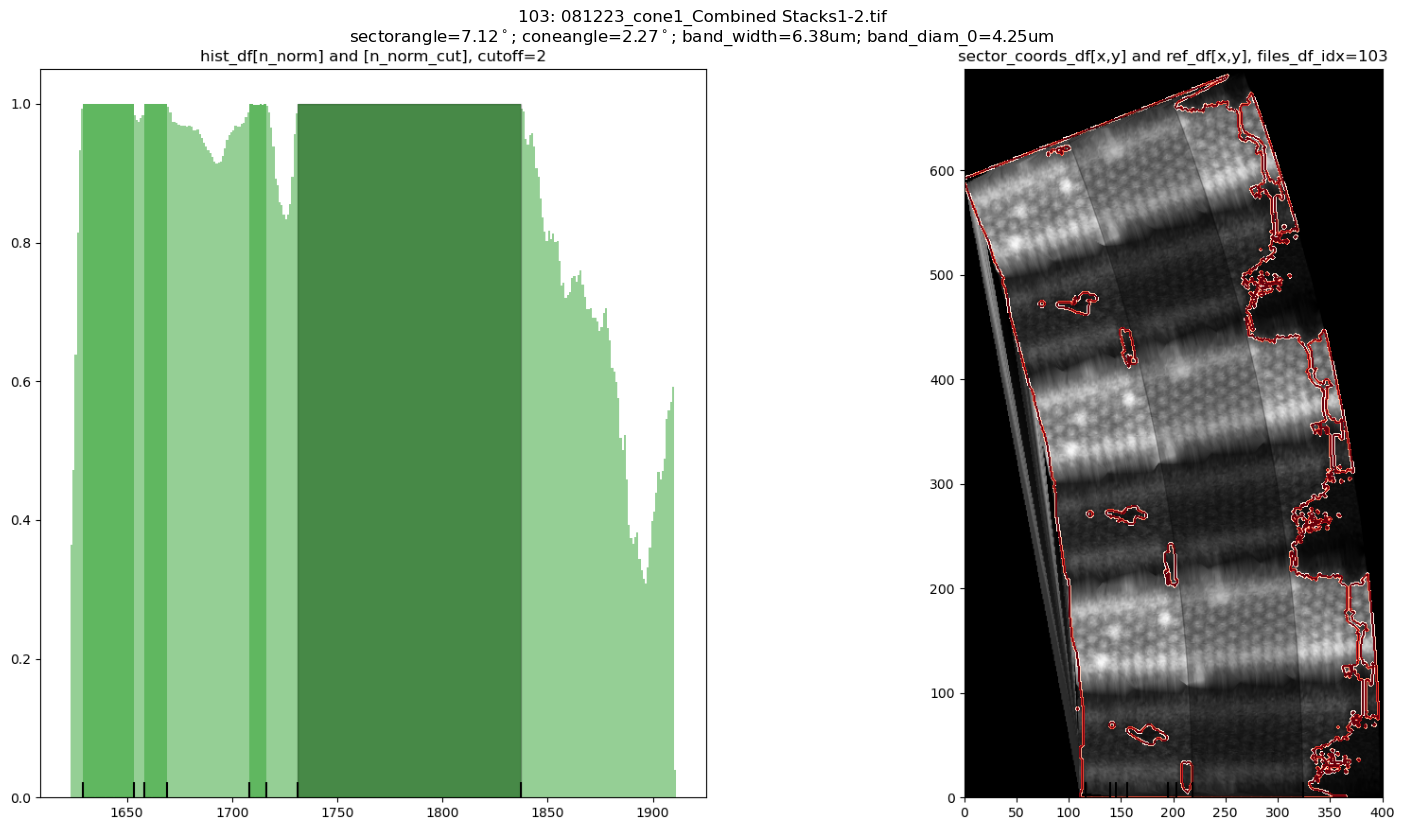

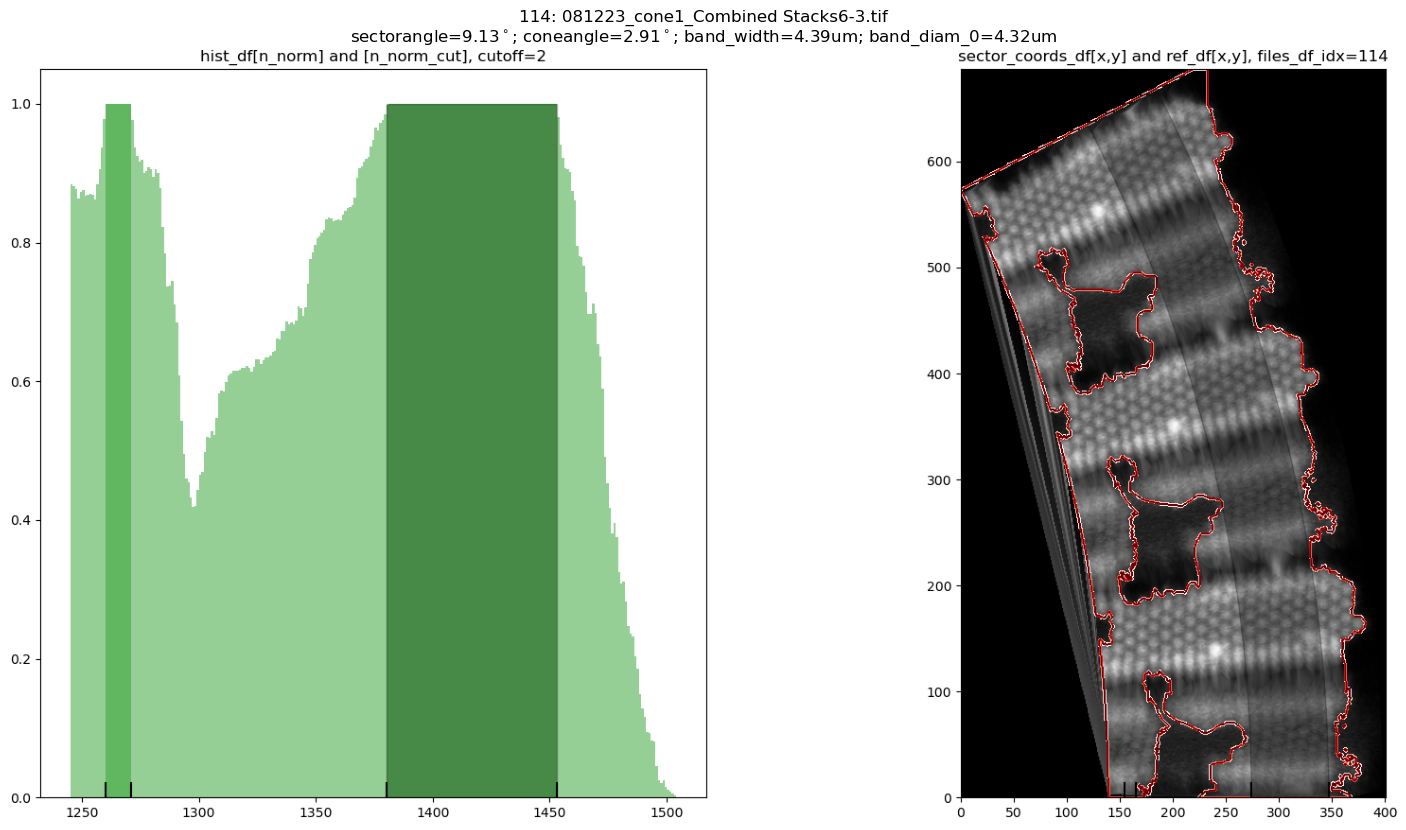

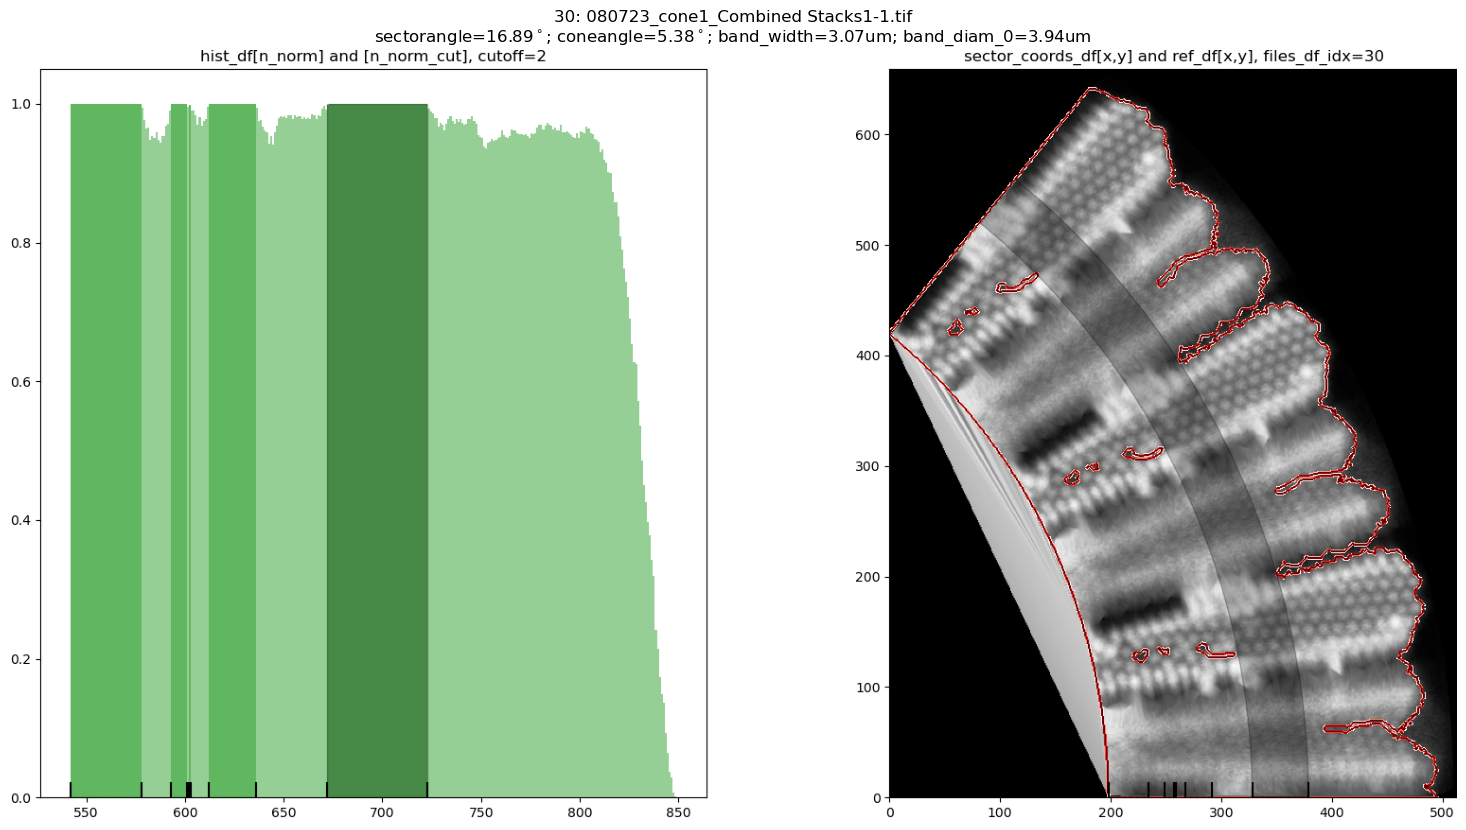

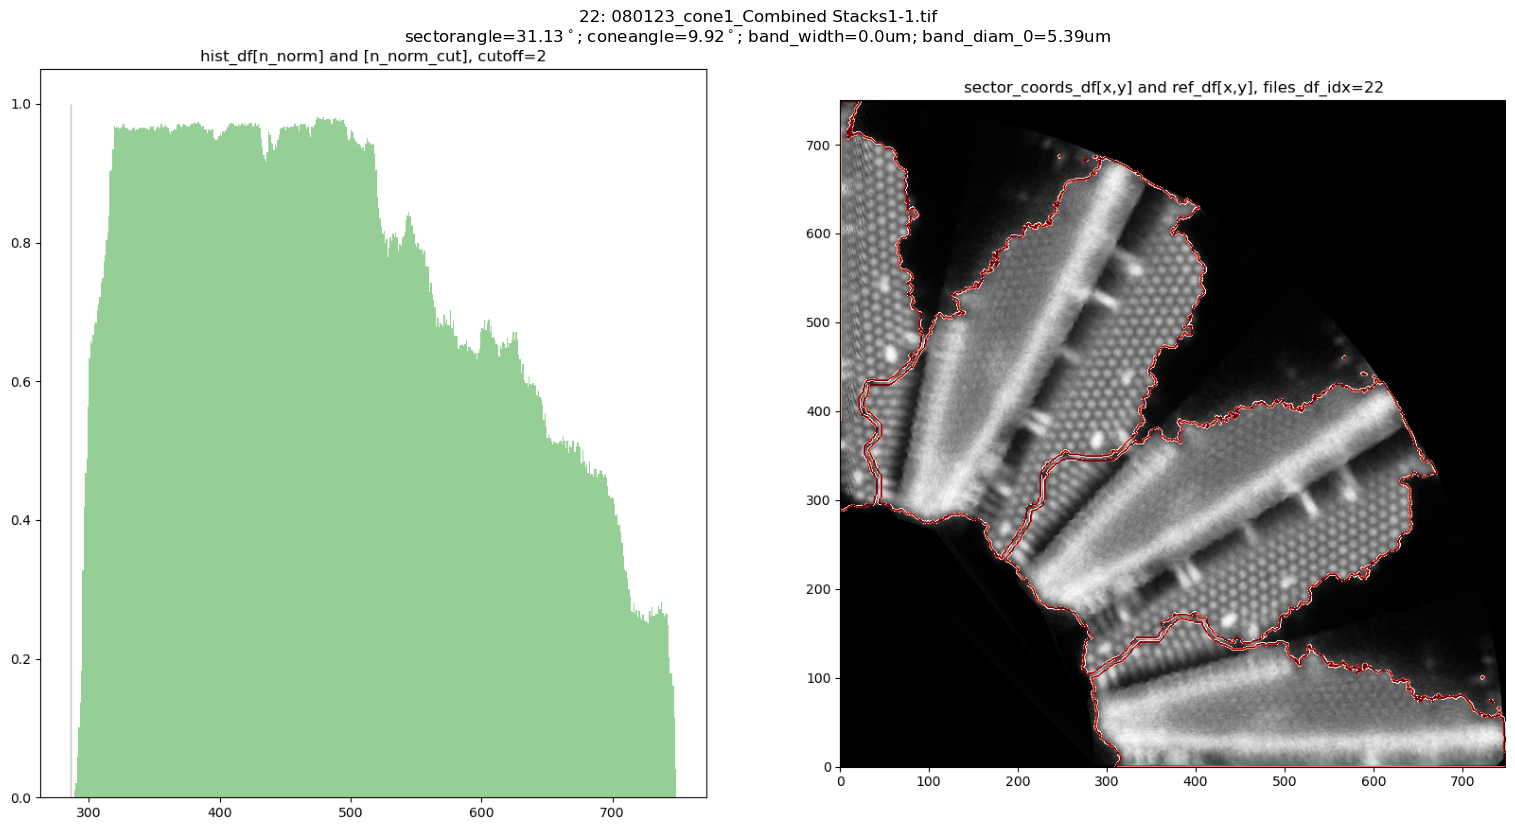

plot the dislocation spacing expected by h=b/phi


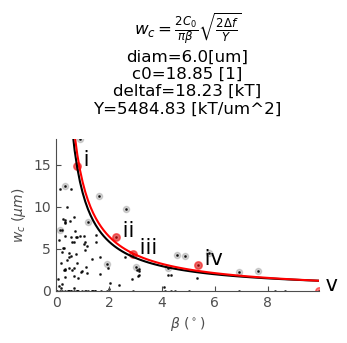

In [50]:
print('highlight and show select points')
files_df_idx_list=[1,103,114,30,22]
filtered_x=[]
filtered_y=[]
filtered_c=[]
filtered_row_idx=[]
filtered_files_df_idx=[]
for files_df_idx in files_df_idx_list:
    im=io.imread(dir_path+'/all grains/bands/'+str(files_df_idx)+'_'+files_df.iloc[files_df_idx]['file_name'].split('.')[0]+'.png')    
    fig=plt.figure(figsize=(20,10))
    ax=fig.add_subplot(111)    
    ax.imshow(im)
    ax.set_title(str(files_df_idx)+': '+files_df['file_name'].iloc[files_df_idx]+'\n'
                 +'sectorangle='+str(round(np.abs(files_df['sectorangle'].iloc[files_df_idx]),2))+r'$^\circ$'+'; '
                 +'coneangle='+str(round(np.abs(files_df['coneangle'].iloc[files_df_idx]),2))+r'$^\circ$'+'; '                 
                 +'band_width='+str(round(files_df['band_width'].iloc[files_df_idx]*px2um,2))+'um; '
                 +'band_diam_0='+str(round(files_df['band_diam_0'].iloc[files_df_idx]*px2um,2))+'um')
    ax.axis('off')
    plt.show()
    filtered_x+=[np.abs(data_df['coneangle'].iloc[files_df_idx])]
    filtered_y+=[data_df['band_width_um'].iloc[files_df_idx]]
    filtered_c+=[data_df['band_diam_um'].iloc[files_df_idx]]
    filtered_row_idx+=[-100]
    filtered_files_df_idx+=[files_df_idx]
    
####
####
####
fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

a=np.unique(fit['a'])
b=np.unique(fit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
# ax.plot(np.exp(fit['x_line']), np.exp(fit['y_line'])) #values here are right but spaced too far apart
ax.plot(x, y,c='k') #new values for curve that are smoother

ax.scatter(np.rad2deg(np.exp(fit['x'])),np.exp(fit['y']),s=20,alpha=0.15,c='k') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.
ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(diam_input)+'[um]'             
             +'\n'
            +'c0='+str(round(np.pi*diam_input,2))+' [1]'
            +'\n'
            +'deltaf='+str(round(deltaf_input,2))+' [kT]'
            +'\n'
            +'Y='+str(round(Y_input,2))+' [kT/um^2]'
            +'\n') #             +r'$w_c=\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$'


print('plot the dislocation spacing expected by h=b/phi')
a0=0.710 #um
coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates
sectorangle_rad=2*np.pi*np.sin(np.deg2rad(coneangle)/2) #in rad
y=a0/np.tan(sectorangle_rad) #um. h=b/phi (small angle approx) or h=b/tan(phi)
x=coneangle
ax.plot(x,y,c='red')

filtered_df=pd.DataFrame({'filtered_x':filtered_x,'filtered_y':filtered_y,'filtered_c':filtered_c,'filtered_row_idx':filtered_row_idx,'filtered_files_df_idx':filtered_files_df_idx})
text_list=[' i',' ii',' iii',' iv',' v',' vi',' vii',' viii',' ix',' x']
ax.scatter(filtered_df['filtered_x'],filtered_df['filtered_y'],alpha=0.5,s=30,c='red')
for idx in range(len(filtered_df)):
    xy=(filtered_df['filtered_x'].iloc[idx],filtered_df['filtered_y'].iloc[idx])
    ax.annotate(text_list[idx], xy,fontsize=15)
#####
#####
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle-annotate.png',bbox_inches='tight')
plt.savefig(dir_path+'/all grains/bands/plots/bandwidth_vs_coneangle-annotate.svg',bbox_inches='tight')

highlight and show select points


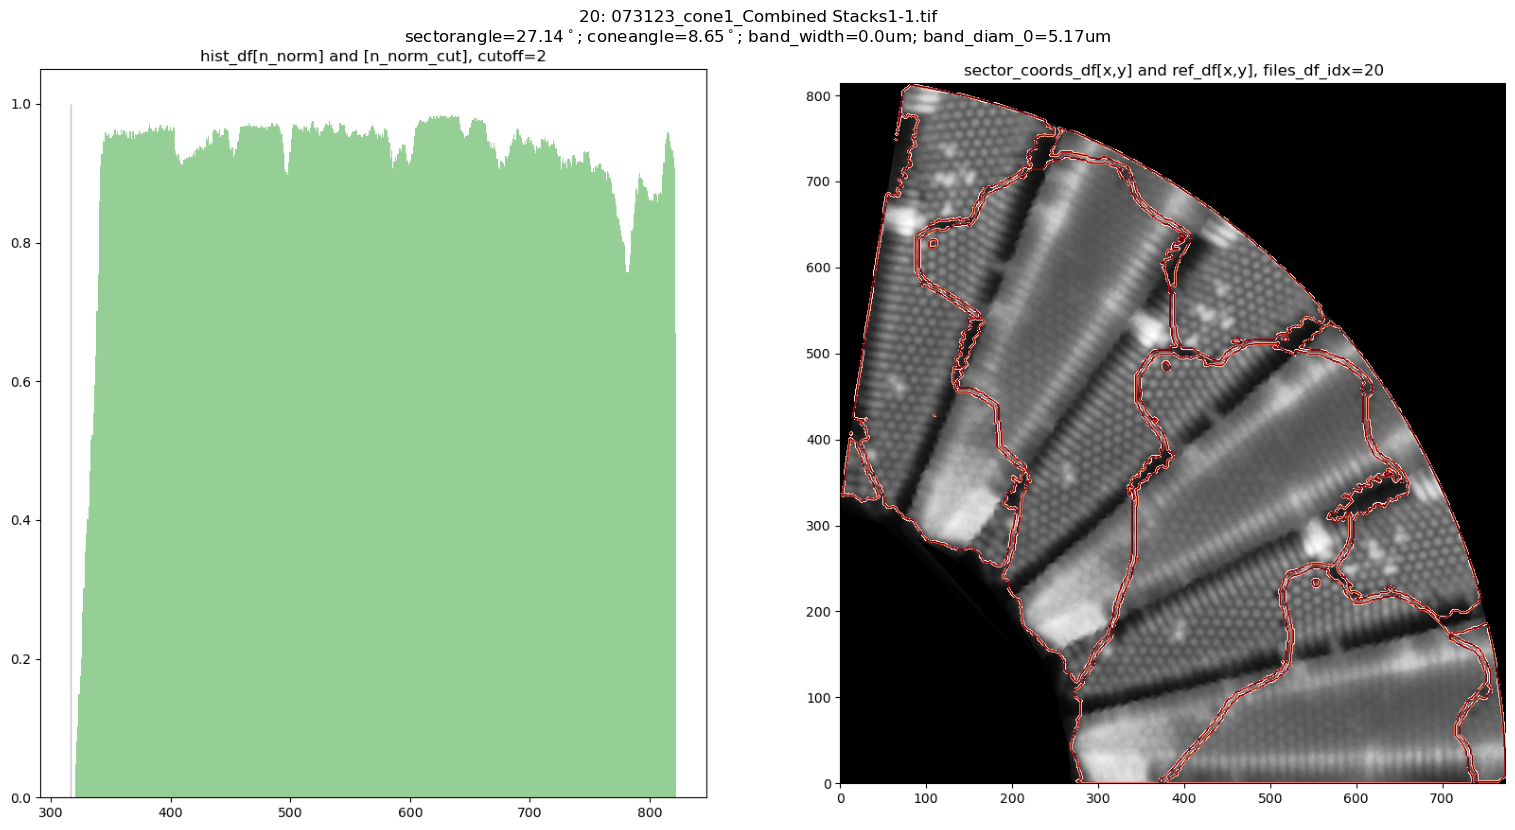

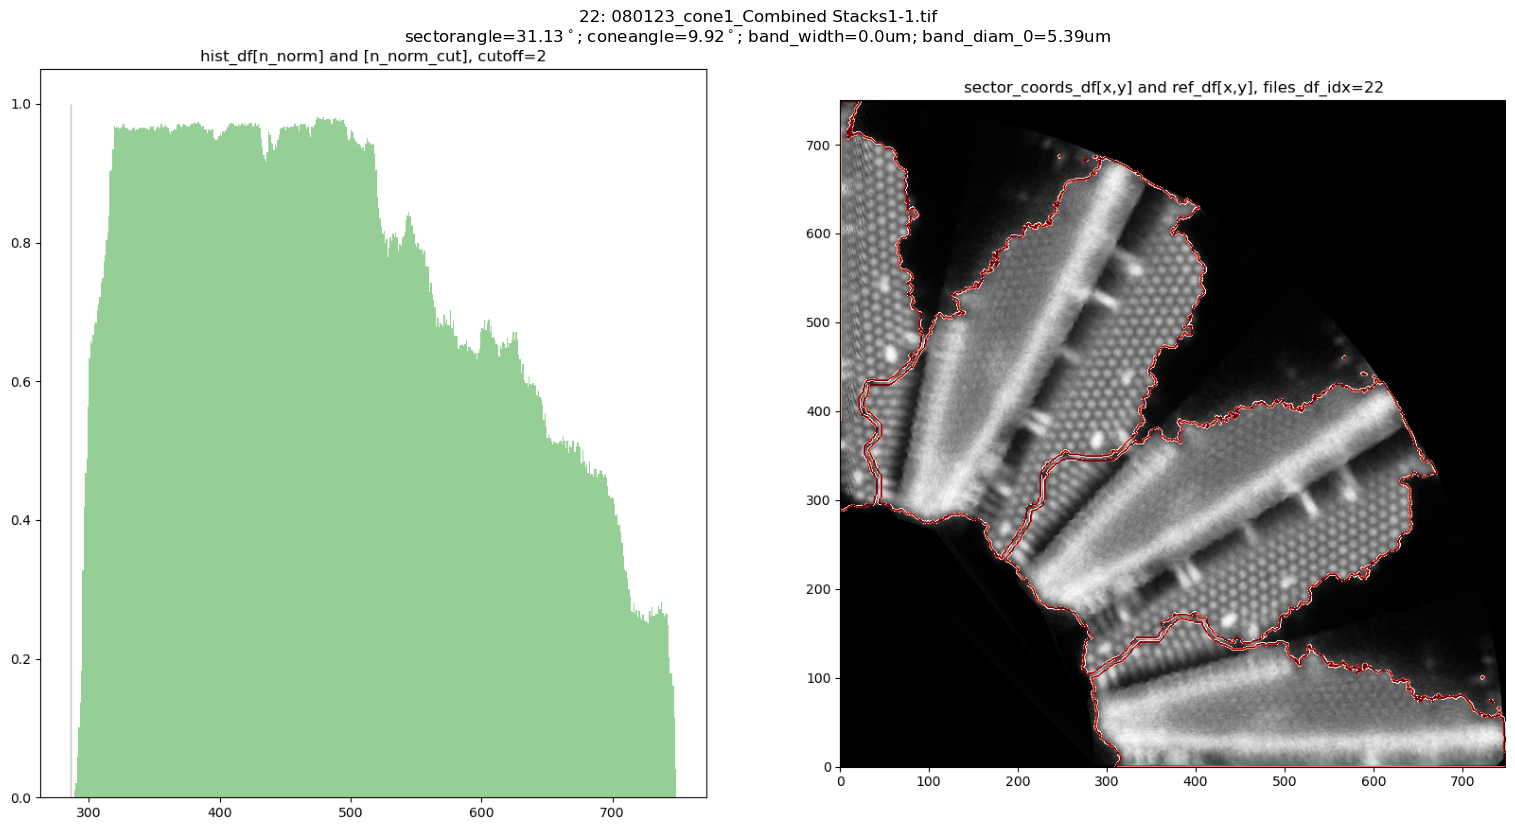

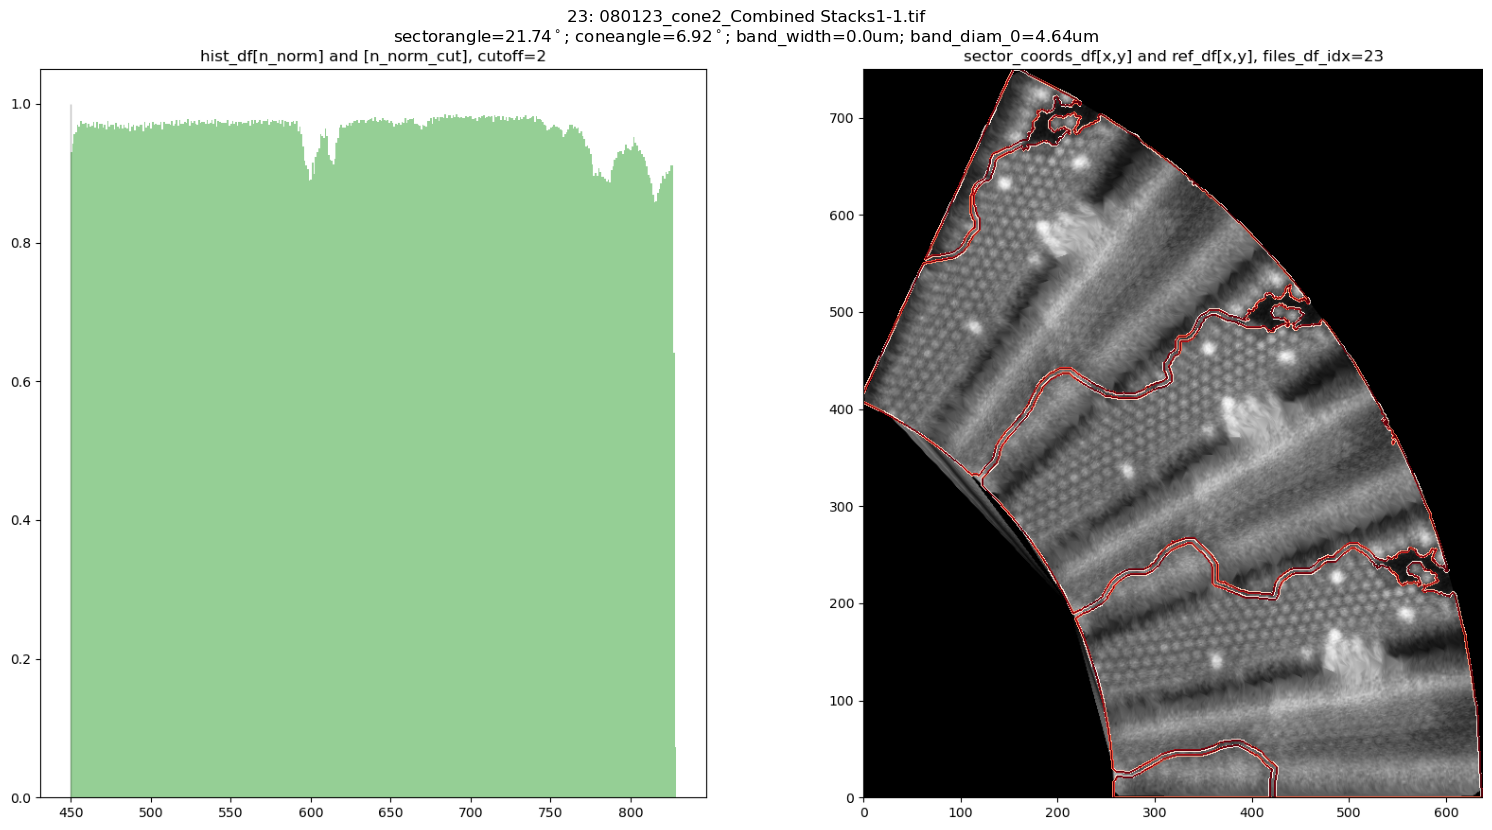

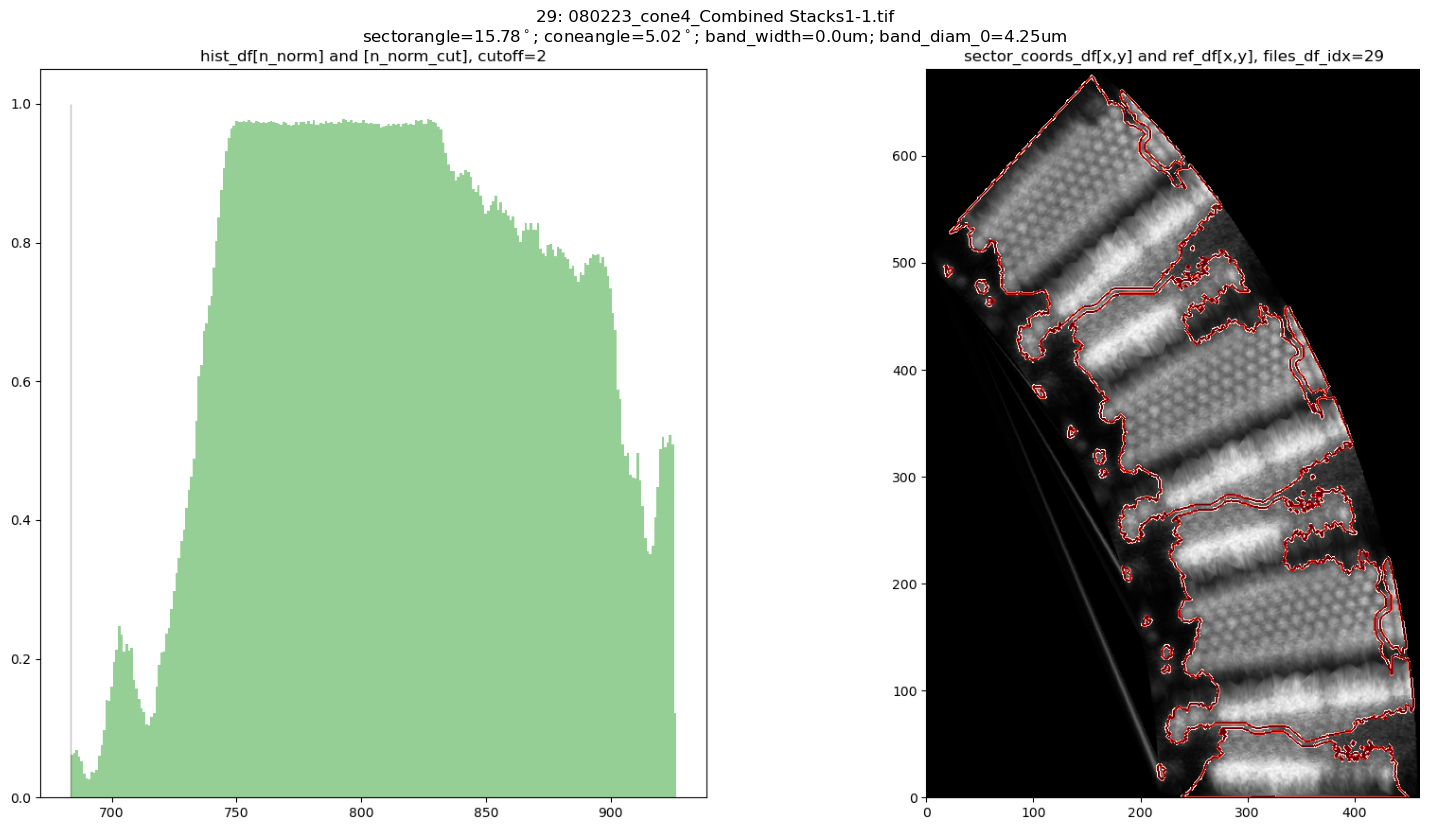

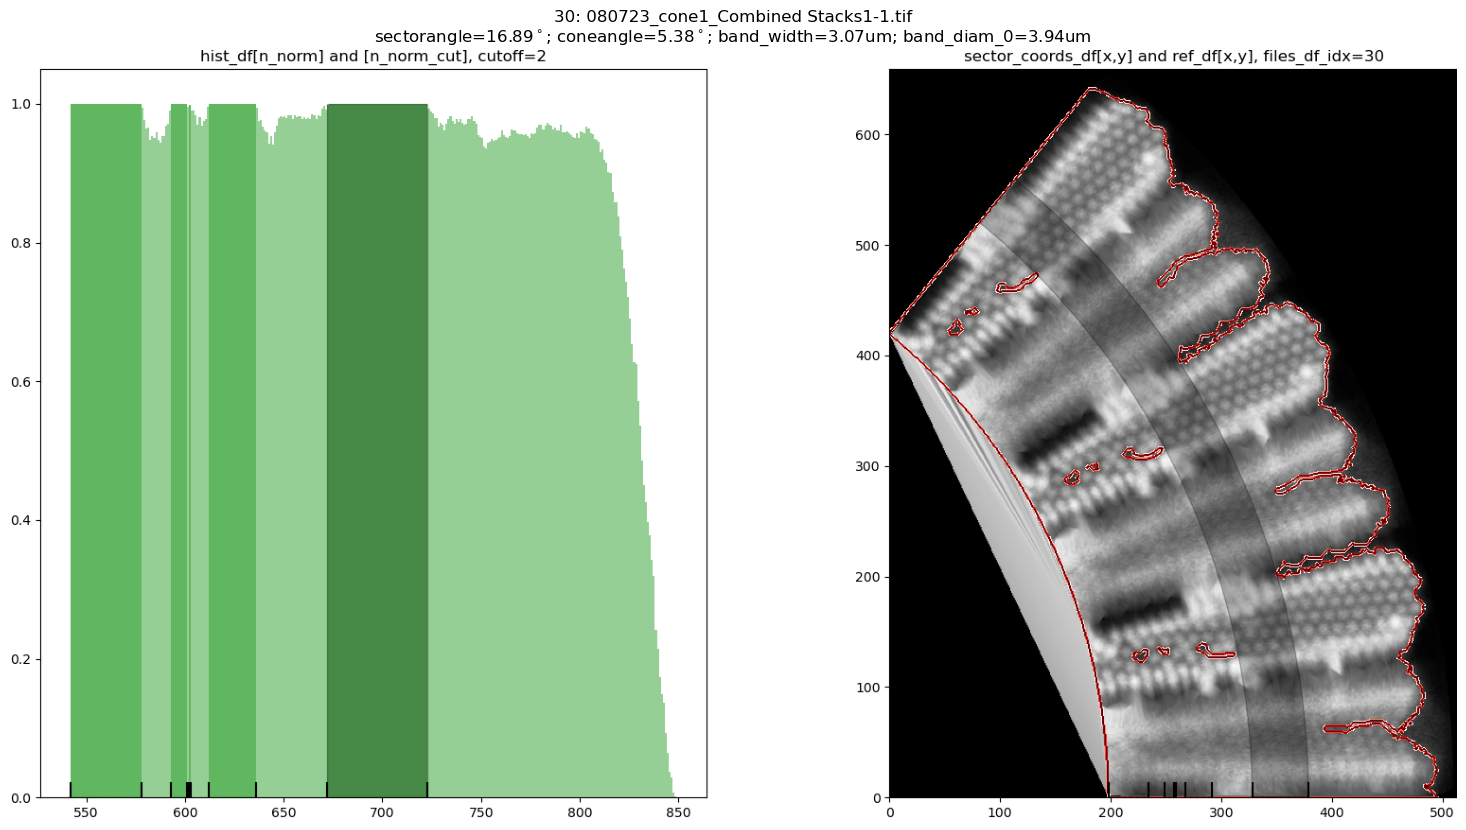

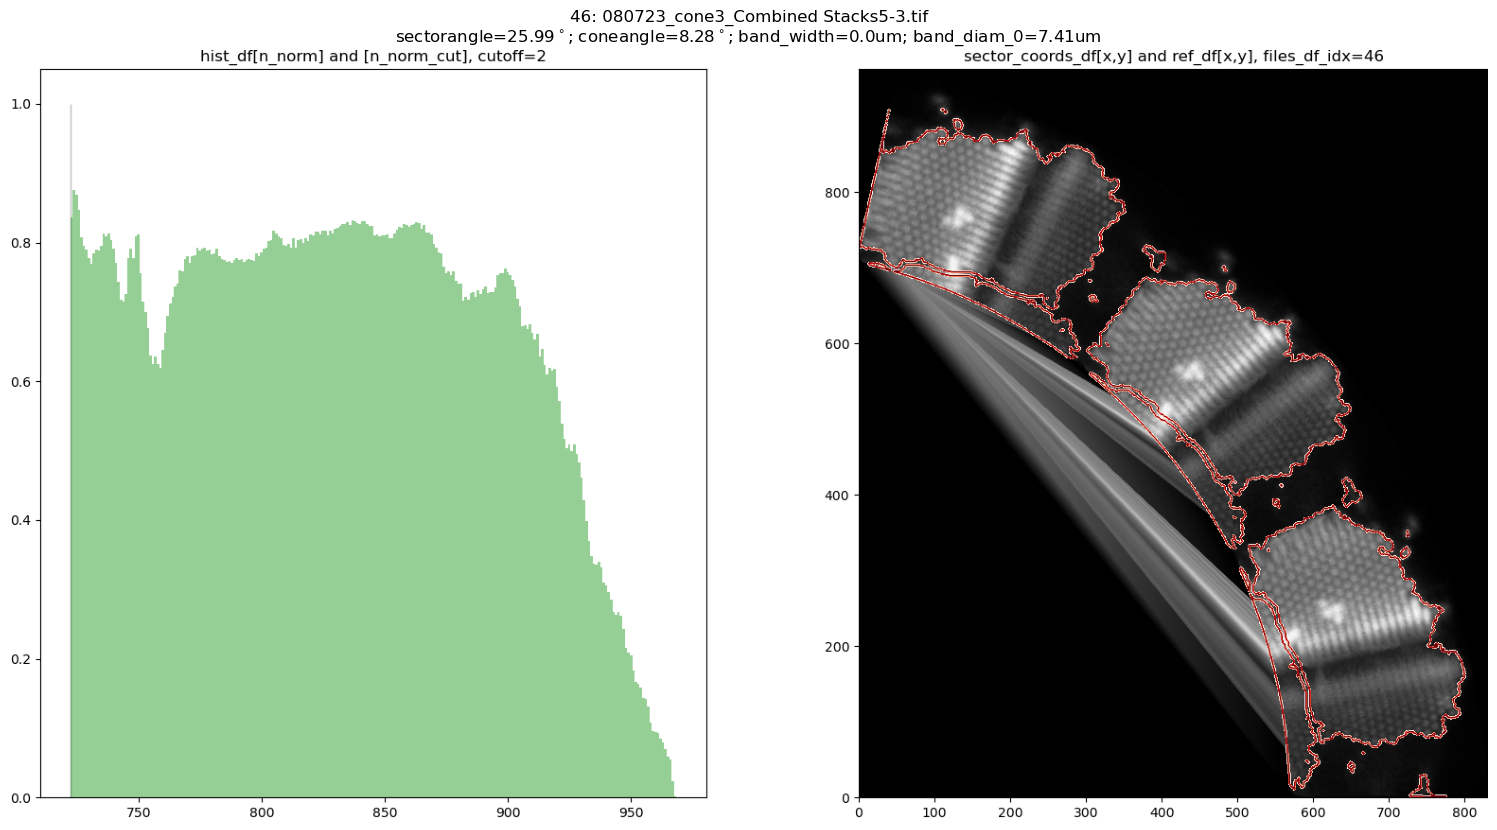

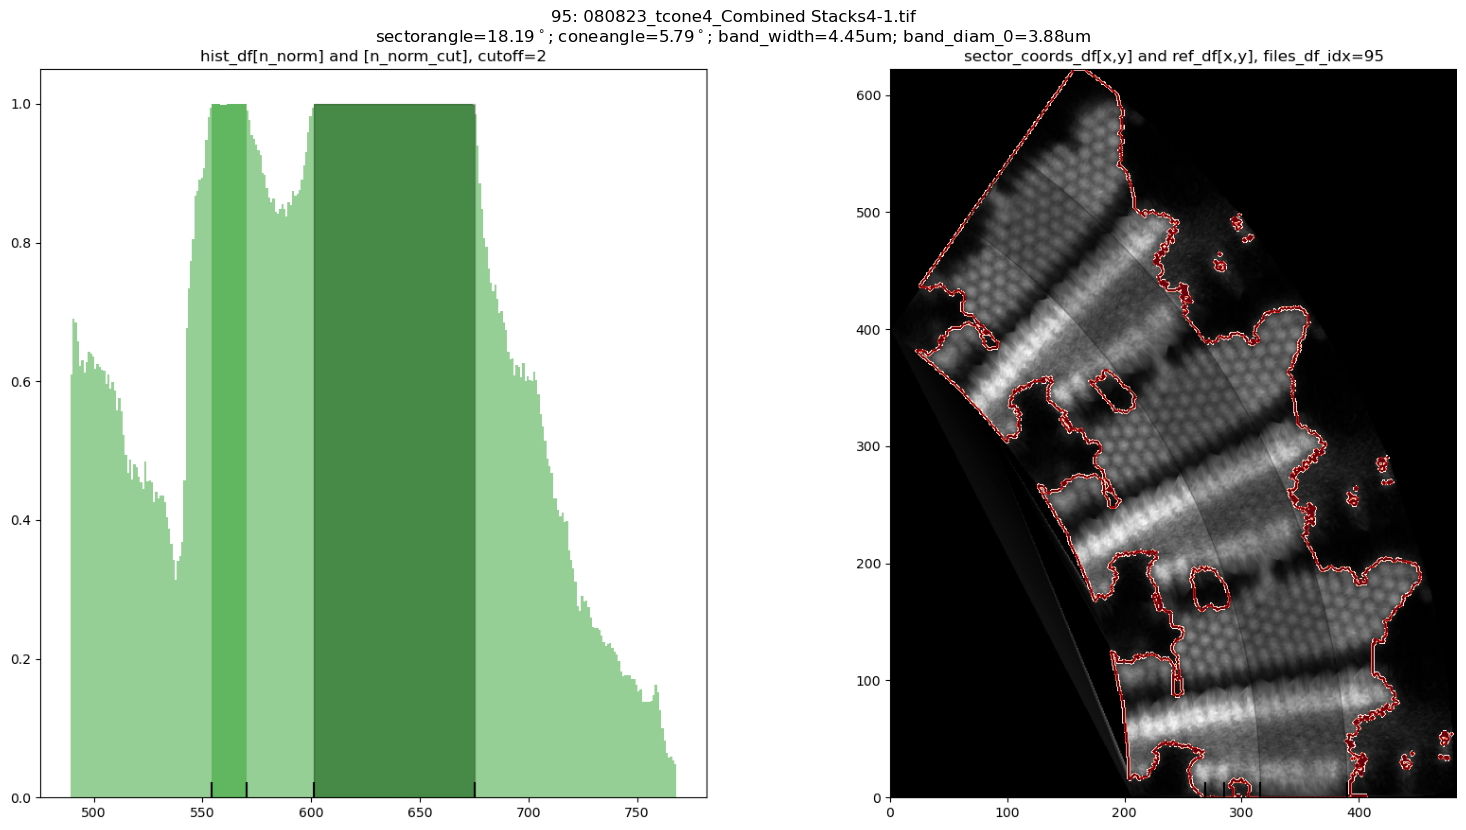

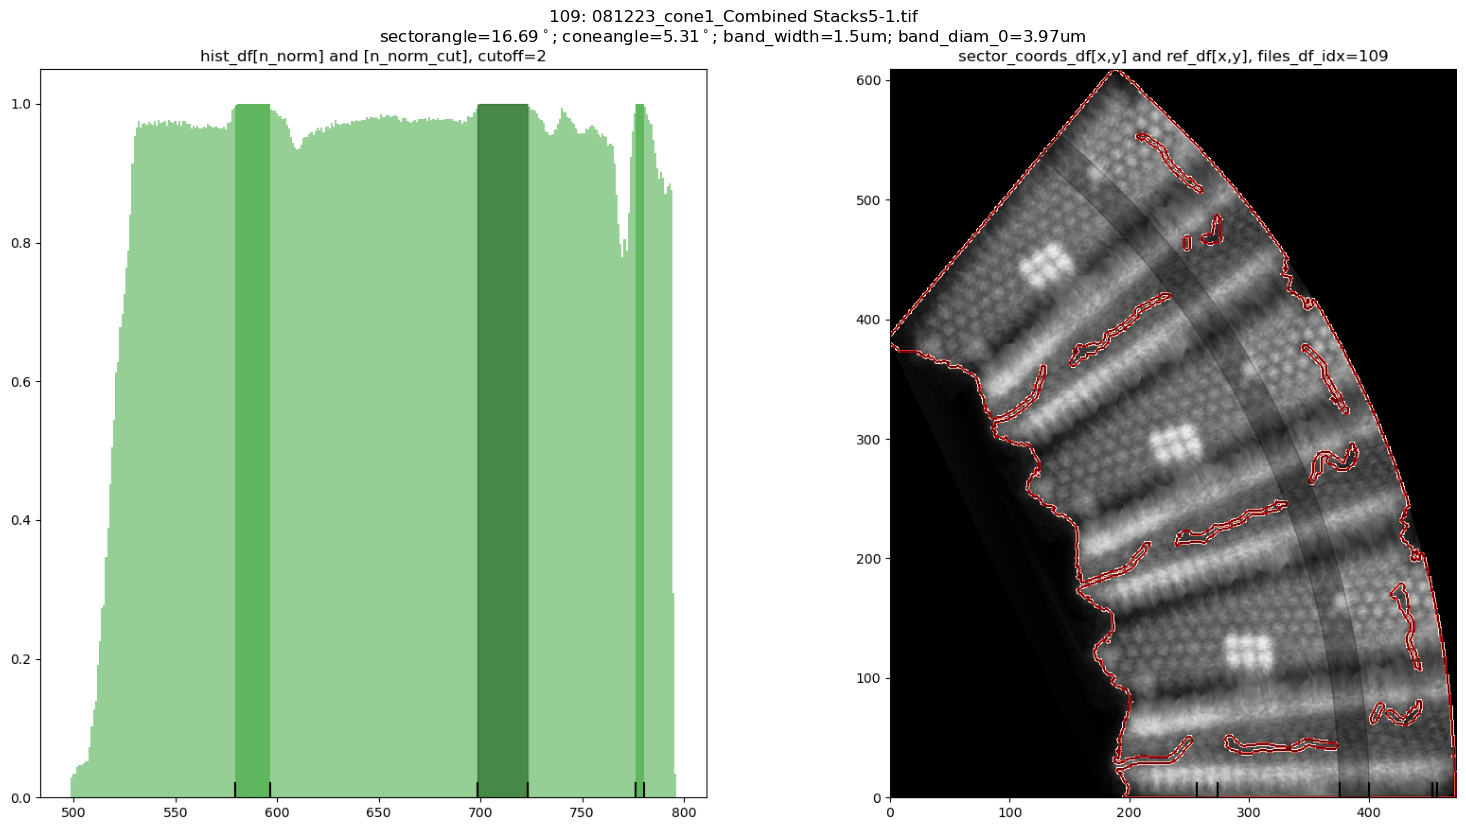

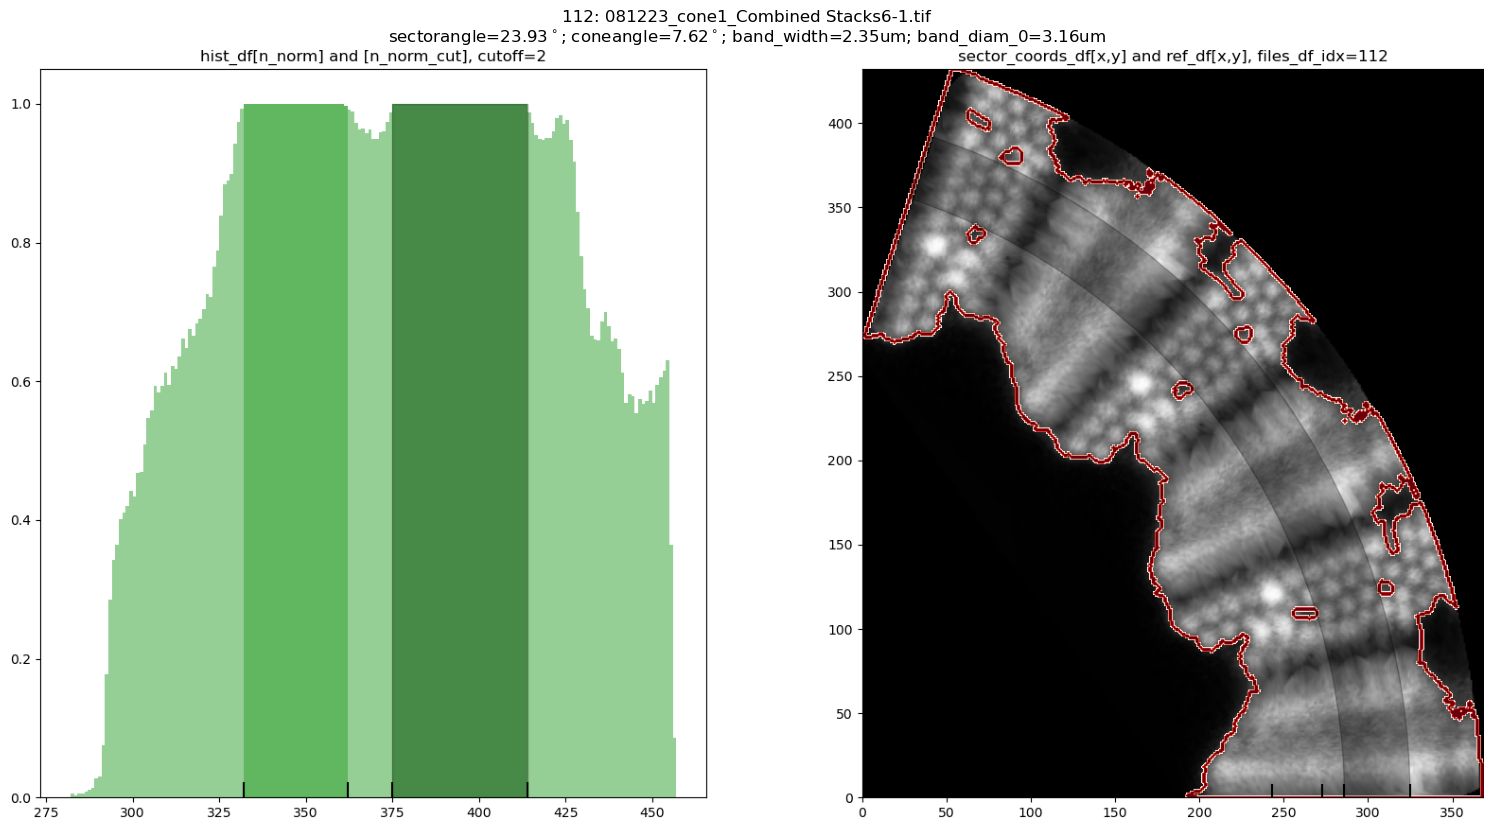

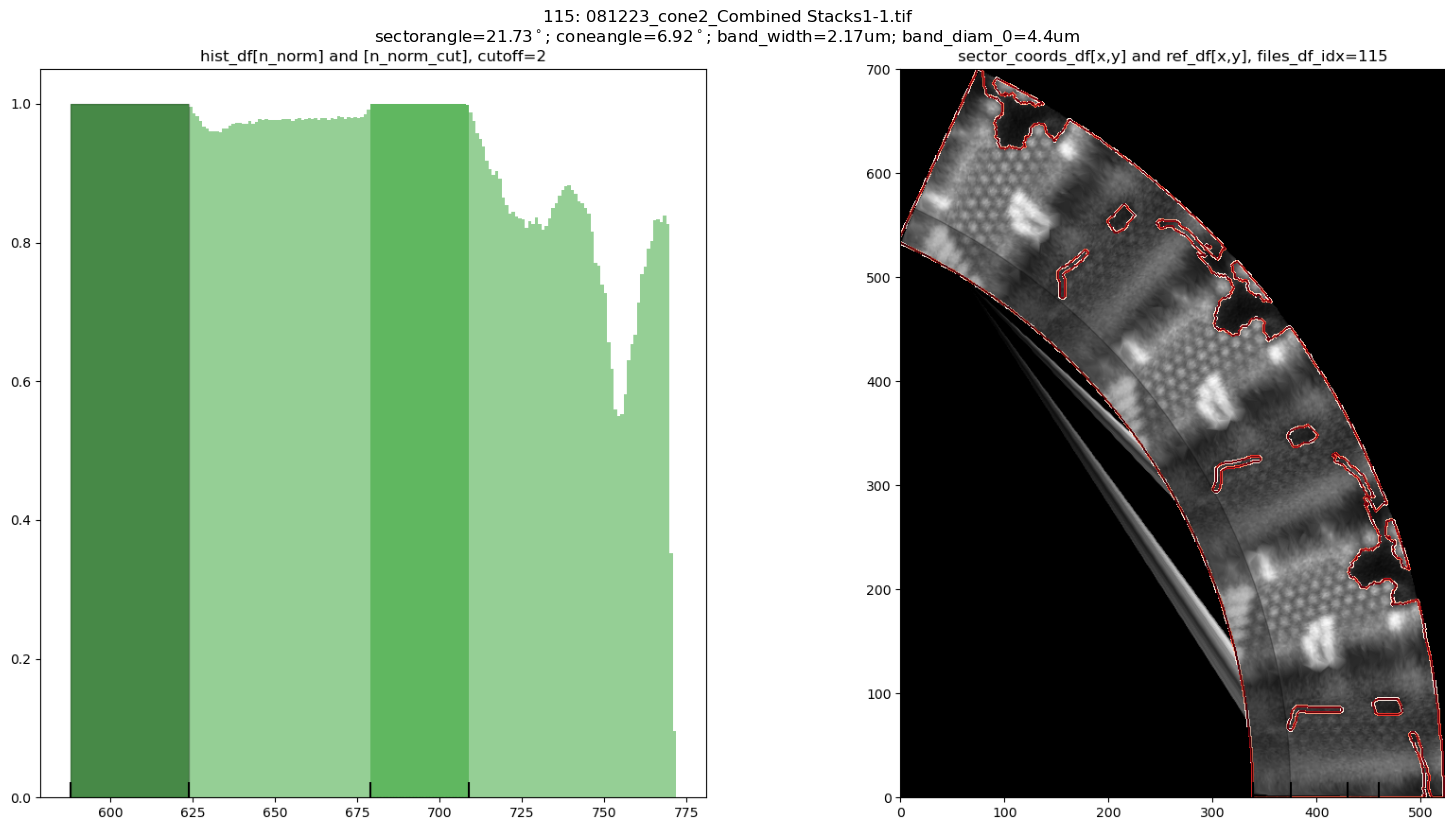

plot the dislocation spacing expected by h=b/phi


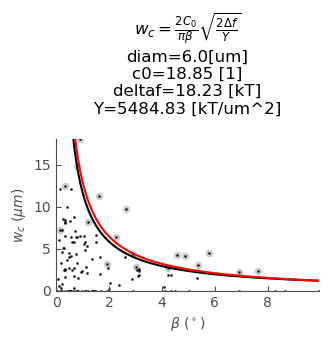

In [51]:
print('highlight and show select points')
files_df_idx_list=data_df[data_df['coneangle']>=5].index.values
filtered_x=[]
filtered_y=[]
filtered_c=[]
filtered_row_idx=[]
filtered_files_df_idx=[]
for files_df_idx in files_df_idx_list:
    im=io.imread(dir_path+'/all grains/bands/'+str(files_df_idx)+'_'+files_df.iloc[files_df_idx]['file_name'].split('.')[0]+'.png')    
    fig=plt.figure(figsize=(20,10))
    ax=fig.add_subplot(111)    
    ax.imshow(im)
    ax.set_title(str(files_df_idx)+': '+files_df['file_name'].iloc[files_df_idx]+'\n'
                 +'sectorangle='+str(round(np.abs(files_df['sectorangle'].iloc[files_df_idx]),2))+r'$^\circ$'+'; '
                 +'coneangle='+str(round(np.abs(files_df['coneangle'].iloc[files_df_idx]),2))+r'$^\circ$'+'; '                 
                 +'band_width='+str(round(files_df['band_width'].iloc[files_df_idx]*px2um,2))+'um; '
                 +'band_diam_0='+str(round(files_df['band_diam_0'].iloc[files_df_idx]*px2um,2))+'um')
    ax.axis('off')
    plt.show()
    filtered_x+=[np.abs(data_df['coneangle'].iloc[files_df_idx])]
    filtered_y+=[data_df['band_width_um'].iloc[files_df_idx]]
    filtered_c+=[data_df['band_diam_um'].iloc[files_df_idx]]
    filtered_row_idx+=[-100]
    filtered_files_df_idx+=[files_df_idx]
    
####
####
####
fig=plt.figure(figsize=(8.6*cm,5*cm))
ax=fig.add_subplot(111)

ax.scatter(data_df['coneangle'],data_df['band_width_um'],c='k',s=1,alpha=0.75)
ax.set_xlim(0,np.max(data_df['coneangle']))
ax.set_ylim(0,np.max(data_df['band_width_um']))
ax.set_xlabel(r'$\beta$'+' ('+r'$^\circ)$')
ax.set_ylabel(r'$w_c$'+' ('+r'$\mu m$'+')')
axis_color='0.3'
ax.tick_params(direction="in",colors=axis_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(axis_color)
ax.spines['left'].set_color(axis_color)
ax.xaxis.label.set_color(axis_color)
ax.yaxis.label.set_color(axis_color)

a=np.unique(fit['a'])
b=np.unique(fit['b'])
x=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1)
y=np.exp(a*np.log(np.deg2rad(x))+b) #a and b are for linear fit of the log-log plot. the cone angle beta should be in radians to match the fitting.
ax.plot(x, y,c='k') #new values for curve that are smoother

ax.scatter(np.rad2deg(np.exp(fit['x'])),np.exp(fit['y']),s=20,alpha=0.15,c='k') #highlight the points used to find fit. convert log(beta) to beta then make sure its in degrees this time.
ax.set_title(r'$w_c=\frac{2C_0}{\pi\beta}\sqrt{\frac{2\Delta f}{Y}}$'
             +'\n'
             +'diam='+str(diam_input)+'[um]'             
             +'\n'
            +'c0='+str(round(diam_input*np.pi,2))+' [1]'
            +'\n'
            +'deltaf='+str(round(deltaf_input,2))+' [kT]'
            +'\n'
            +'Y='+str(round(Y_input,2))+' [kT/um^2]'
            +'\n') #             +r'$w_c=\frac{2C_0}{2\pi sin^{-1}(\frac{\phi}{2\pi})}\sqrt{\frac{2\Delta f}{Y}}$'


print('plot the dislocation spacing expected by h=b/phi')
a0=0.710 #um
coneangle=np.arange(0.1,np.max(data_df['coneangle'])+0.1,0.1) #in deg, or x-axis coordinates
sectorangle_rad=2*np.pi*np.sin(np.deg2rad(coneangle)/2) #in rad
y=a0/np.tan(sectorangle_rad) #um. h=b/phi (small angle approx) or h=b/tan(phi)
x=coneangle
ax.plot(x,y,c='red')

/Users/jessicasun/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jessicasun/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/jessicasun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jessicasun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jessicasun/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: F

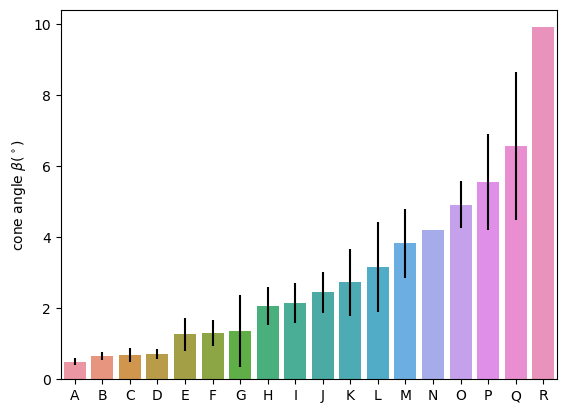

In [55]:
pullparams_table=pd.read_excel(dir_path+'all grains/figs/appendix/pullparams_table.xlsx')

pullparams_dict={}
for pullparams in np.unique(pullparams_table['pullparams']):
    coneangle_values=np.abs(pullparams_table[pullparams_table['pullparams']==pullparams]['coneangle (°)'].values)
    pullparams_dict[pullparams]=coneangle_values
pullparams_df=pd.DataFrame([pullparams_dict]).T.reset_index()
pullparams_df=pullparams_df.rename(columns={'index':'pullparams',0:'coneangle_values'})
temp=pullparams_df['pullparams'].str.split('_',expand=True)
pullparams_df['fibertype'],pullparams_df['heat'],pullparams_df['pull'],pullparams_df['vel'],pullparams_df['time']=temp[0],temp[1],temp[2],temp[3],temp[4]

coneangle_mean=[]
yerr=[]
for idx in range(len(pullparams_df)):
    values=pullparams_df.iloc[idx]['coneangle_values']
    coneangle_mean+=[np.mean(values)]
    yerr+=[sem(values)]
pullparams_df['coneangle_mean']=coneangle_mean
pullparams_df['yerr']=yerr

pullparams_df=pullparams_df.sort_values(by='coneangle_mean')
alphabet=list(map(chr, range(65,90)))
pullparams_df['letter_label']=alphabet[:len(pullparams_df)]
sns.barplot(x=pullparams_df['letter_label'],y=pullparams_df['coneangle_mean'],yerr=pullparams_df['yerr'])
plt.xlabel('')
plt.ylabel('cone angle '+r'$\beta$'+ r'$(^\circ)$')

plt.savefig(dir_path+'all grains/figs/appendix/pullparams.png',bbox_inches='tight')
plt.savefig(dir_path+'all grains/figs/appendix/pullparams.svg',bbox_inches='tight')

pullparams_df.to_excel(dir_path+'all grains/figs/appendix/pullparams_table_df.xlsx')